<a href="https://colab.research.google.com/github/angiecombs11-ops/PurdueHW/blob/main/create_coherts_of_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import statistics
import operator


In [11]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


# Task
Perform an initial data examination on the `df` DataFrame to check for duplicate rows, handle missing values, and identify outliers. Summarize the findings and recommend appropriate actions.

## Check for Duplicates

### Subtask:
Identify and count any duplicate rows in the DataFrame to understand data redundancy. If duplicates are found, provide a strategy to handle them, such as dropping them or further investigation.


**Reasoning**:
To identify and count duplicate rows in the `df` DataFrame, I will use the `.duplicated()` method and then sum the resulting boolean Series.



In [13]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nDuplicate rows found. Consider investigating their origin or dropping them if they represent redundant data.")
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


## Handle Missing Values

### Subtask:
Examine the DataFrame for missing values (NaNs). Calculate and display the percentage of missing values for each column to prioritize columns for cleaning. Suggest strategies for handling them, such as imputation or removal.


**Reasoning**:
To identify missing values and their proportions, I will calculate the number of missing values and their percentage for each column in the DataFrame `df` and then display this information in a clear format.



In [14]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Filter to show only columns with missing values and sort by percentage
missing_values_df = missing_values_df[missing_values_df['Missing Values Count'] > 0].sort_values(by='Missing Values Percentage', ascending=False)

print("Missing Values Information:")
if missing_values_df.empty:
    print("No missing values found in the DataFrame.")
else:
    print(missing_values_df)

Missing Values Information:
No missing values found in the DataFrame.


## Identify Outliers

### Subtask:
Generate descriptive statistics and box plots for numerical columns to visually identify potential outliers. Discuss potential methods for handling them if necessary.


**Reasoning**:
To begin identifying outliers, I will first get a summary of descriptive statistics for all numerical columns in the DataFrame `df`. This will provide key statistical measures such as mean, standard deviation, and quartiles, which are useful for understanding the distribution of the data.



In [16]:
numerical_cols = df.select_dtypes(include=np.number)
print("Descriptive Statistics for Numerical Columns:")
print(numerical_cols.describe())

Descriptive Statistics for Numerical Columns:
        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249   

**Reasoning**:
To visually identify potential outliers, I will generate box plots for each numerical column. I will arrange these plots in a grid for better visualization and readability.



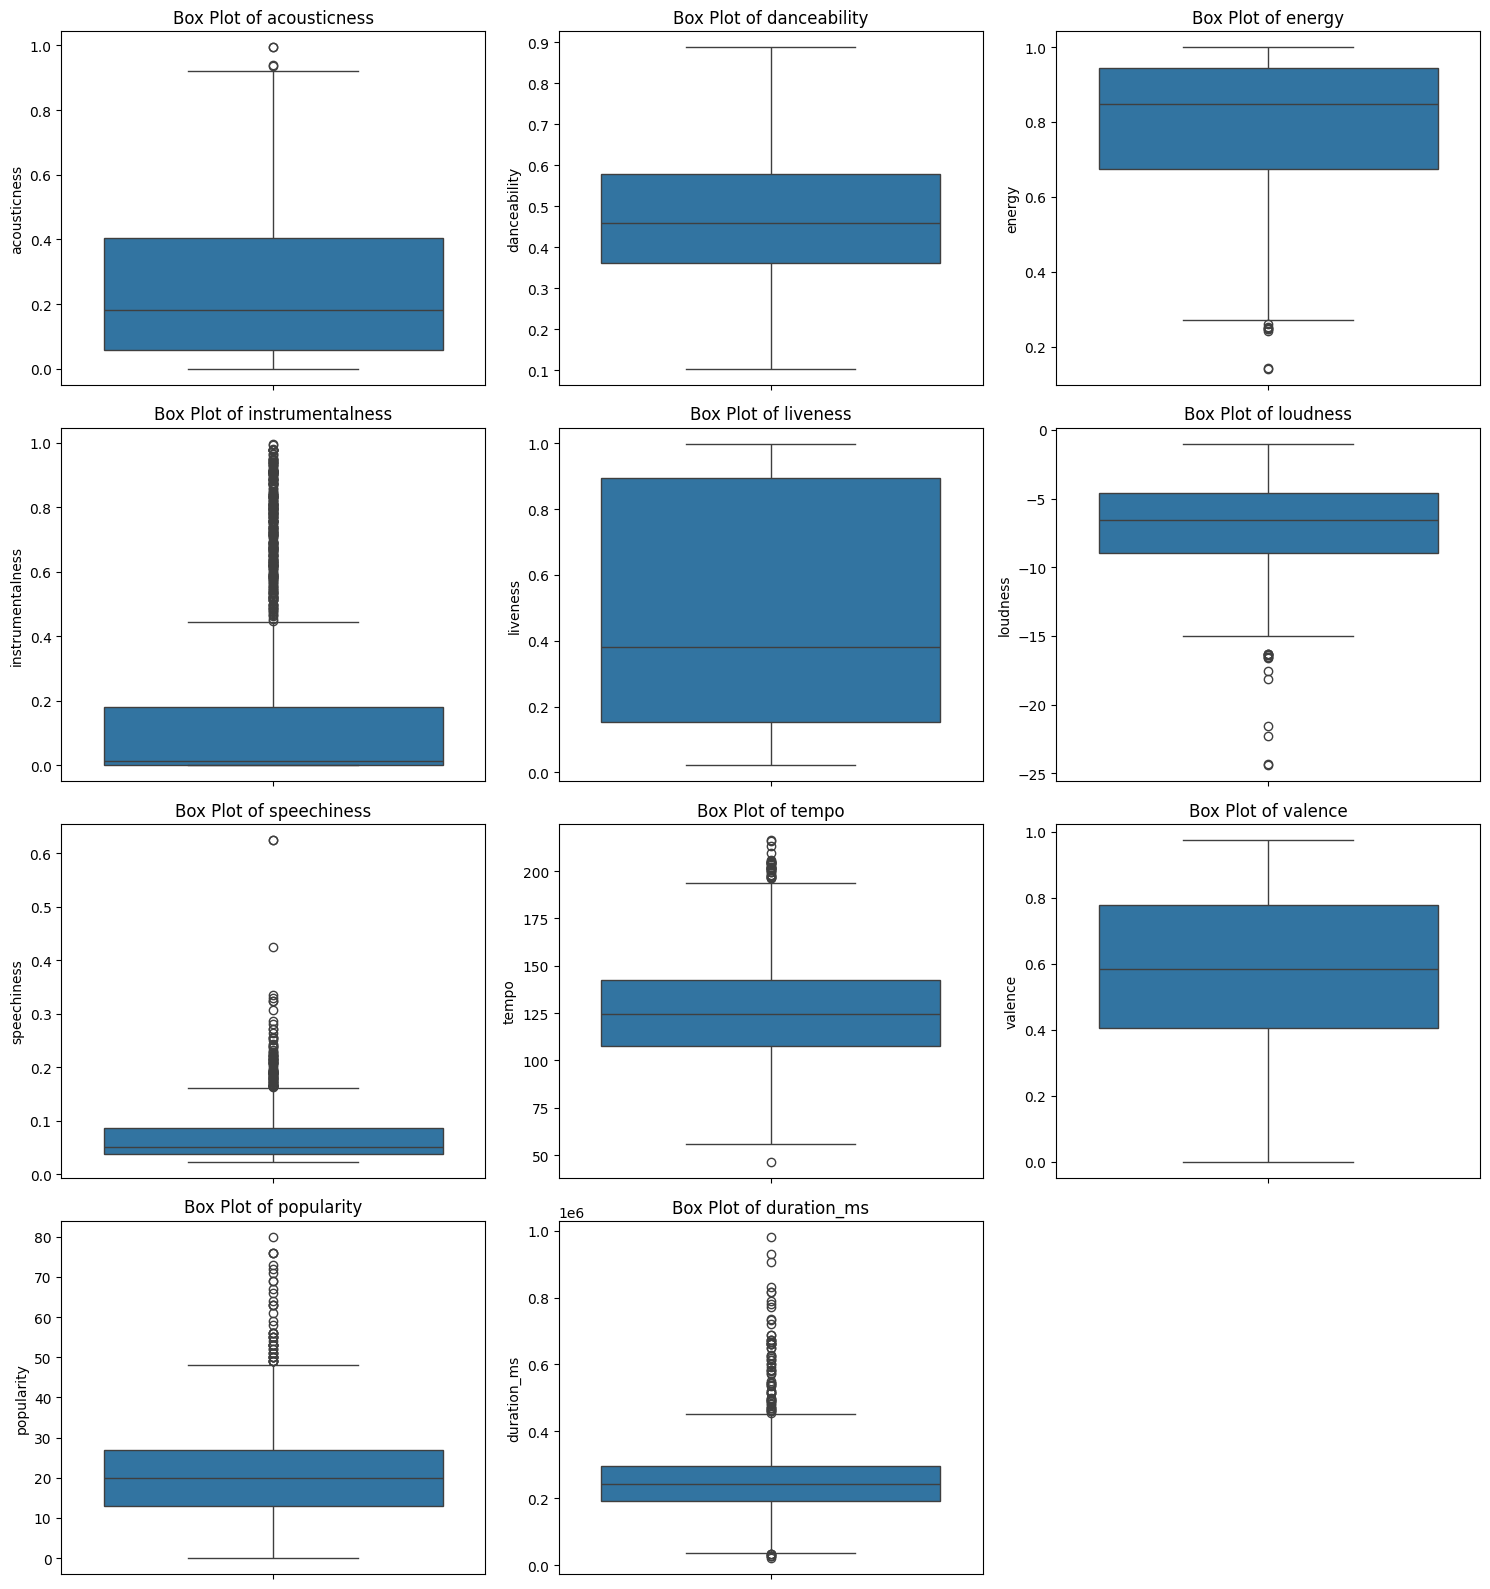

In [17]:
num_cols = df.select_dtypes(include=np.number).columns

# Exclude 'Unnamed: 0' and 'track_number' as they are identifiers/indices and not true numerical features for outlier analysis
plot_cols = [col for col in num_cols if col not in ['Unnamed: 0', 'track_number']]

# Determine grid size for subplots
n_cols = 3
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(plot_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Outlier Summary and Handling Recommendations

Based on the descriptive statistics and box plots, several numerical columns exhibit potential outliers:

*   **`acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, `duration_ms`**: These columns show a considerable number of data points extending far beyond the whiskers of the box plots, indicating the presence of high-value outliers. For instance, `duration_ms` has a maximum value significantly higher than its 75th percentile, suggesting some very long tracks.
*   **`loudness`**: Shows outliers at both ends, with some unusually low (more negative) and high (less negative) values.
*   **`danceability`, `energy`, `valence`**: While these columns show some values outside the typical range, the extent of the 'outliers' might be less extreme compared to others, potentially representing natural variations rather than data errors.

#### Potential Methods for Handling Outliers:

1.  **Investigation and Domain Knowledge**: Before any manipulation, it's crucial to investigate the nature of these outliers. Are they data entry errors, measurement errors, or legitimate extreme values? For example, a very long `duration_ms` might be a special edition track, not an error.
2.  **Transformation**: For skewed distributions (which many of these appear to be), transformations like logarithmic or square root transformations can reduce the impact of outliers and make the data more normally distributed. This is particularly useful for features like `duration_ms` or `instrumentalness`.
3.  **Capping/Winsorization**: This involves setting a threshold (e.g., at the 95th or 99th percentile) and replacing all values above this threshold with the threshold value. This can be applied to `acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, and `duration_ms`.
4.  **Imputation**: If outliers are suspected to be errors, they could be treated as missing values and imputed using methods like the mean, median, or more sophisticated techniques based on other features.
5.  **Removal**: In cases where outliers are clearly data errors and are few in number, they might be removed. However, this should be done cautiously to avoid losing valuable information. This might be considered for extreme values in `loudness` if they are confirmed errors.
6.  **Robust Models**: Using machine learning models that are less sensitive to outliers (e.g., tree-based models) can also be an approach, though data cleaning is generally preferred.

The choice of method depends on the nature of the outliers, the specific column, and the goals of the analysis or modeling task. Given the dataset is about music, some extreme values (e.g., very high `liveness` for live performances, very long `duration_ms` for extended versions) might be legitimate and should not be removed without careful consideration.

## Final Task

### Subtask:
Provide a summary of the initial data examination, including any identified duplicates, missing values, or outliers, and the actions taken or recommended.


## Summary:

### Data Analysis Key Findings

*   **Duplicates**: The DataFrame contains no duplicate rows.
*   **Missing Values**: There are no missing values in any of the columns within the DataFrame.
*   **Outliers**: Potential outliers were identified in several numerical columns:
    *   High-value outliers were observed in `acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, and `duration_ms`. For example, `duration_ms` showed a wide range from 21 seconds to over 16 minutes.
    *   `loudness` exhibited outliers at both ends of its distribution, ranging from approximately -24.4 dB to -1.014 dB.
    *   `danceability`, `energy`, and `valence` also showed some values outside their typical ranges, though these might represent natural variations.

### Insights or Next Steps

*   Prioritize an in-depth investigation into the nature of the identified outliers using domain knowledge to distinguish between legitimate extreme values (e.g., very long tracks, live performances) and potential data errors before applying any treatment.
*   Based on the investigation, consider applying suitable outlier handling techniques such as data transformation (e.g., logarithmic for skewed distributions), capping/Winsorization for extreme values, or using robust models for subsequent analyses, rather than immediate removal, to preserve valuable information.


# Task
Define and implement a strategy for handling outliers in the `df` DataFrame by applying capping techniques. Specifically, cap high-value outliers in columns such as `acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, and `duration_ms` at the 99th percentile. Additionally, cap both lower and upper extremes of the `loudness` column at the 1st and 99th percentiles, respectively. Finally, verify the impact of these refinements by regenerating descriptive statistics and box plots for the modified numerical columns.

## Capping High-Value Outliers

### Subtask:
Apply a capping method (e.g., at the 99th percentile) to columns identified with significant high-value outliers such as `acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, and `duration_ms` to reduce their extreme influence.


**Reasoning**:
To apply capping to high-value outliers, I will first create a copy of the original DataFrame, then define the target columns and iterate through them to calculate their 99th percentile, finally capping the values in each column.



In [18]:
df_cleaned = df.copy()

columns_to_cap_high = [
    'acousticness',
    'instrumentalness',
    'liveness',
    'speechiness',
    'tempo',
    'popularity',
    'duration_ms'
]

for col in columns_to_cap_high:
    upper_bound = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = df_cleaned[col].clip(upper=upper_bound)
    print(f"Column '{col}' capped at its 99th percentile: {upper_bound:.2f}")

print("\nHigh-value outliers capped in df_cleaned.")

Column 'acousticness' capped at its 99th percentile: 0.85
Column 'instrumentalness' capped at its 99th percentile: 0.95
Column 'liveness' capped at its 99th percentile: 0.99
Column 'speechiness' capped at its 99th percentile: 0.25
Column 'tempo' capped at its 99th percentile: 201.90
Column 'popularity' capped at its 99th percentile: 58.91
Column 'duration_ms' capped at its 99th percentile: 672778.97

High-value outliers capped in df_cleaned.


**Reasoning**:
To continue with the outlier handling strategy, I will now cap both the lower and upper extremes of the `loudness` column in the `df_cleaned` DataFrame. This involves calculating the 1st and 99th percentiles for this column and then clipping values outside this range.



In [19]:
lower_bound_loudness = df_cleaned['loudness'].quantile(0.01)
upper_bound_loudness = df_cleaned['loudness'].quantile(0.99)

df_cleaned['loudness'] = df_cleaned['loudness'].clip(lower=lower_bound_loudness, upper=upper_bound_loudness)

print(f"Column 'loudness' capped at its 1st percentile: {lower_bound_loudness:.2f} and 99th percentile: {upper_bound_loudness:.2f}")
print("Loudness outliers capped in df_cleaned.")

Column 'loudness' capped at its 1st percentile: -14.70 and 99th percentile: -1.98
Loudness outliers capped in df_cleaned.


**Reasoning**:
To verify the impact of the capping operations, I will regenerate and display descriptive statistics for the numerical columns in the `df_cleaned` DataFrame. This will allow for a comparison with the original statistics and confirm the changes in min/max values and overall distribution.



In [20]:
print("Descriptive Statistics for Numerical Columns after Outlier Capping:")
print(df_cleaned.select_dtypes(include=np.number).describe())

Descriptive Statistics for Numerical Columns after Outlier Capping:
        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.249929      0.468860     0.792352   
std     464.911282      6.560220      0.225844      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.851280      0.887000     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.000000  1610.000000  1610.000000  1610.000000   
mean           0.163921     0.491694    -6.941210     0.068629   126.036084   
s

**Reasoning**:
To visually confirm the effect of outlier capping, I will regenerate box plots for the numerical columns in the `df_cleaned` DataFrame. This will show how the extreme values have been reduced compared to the original box plots.



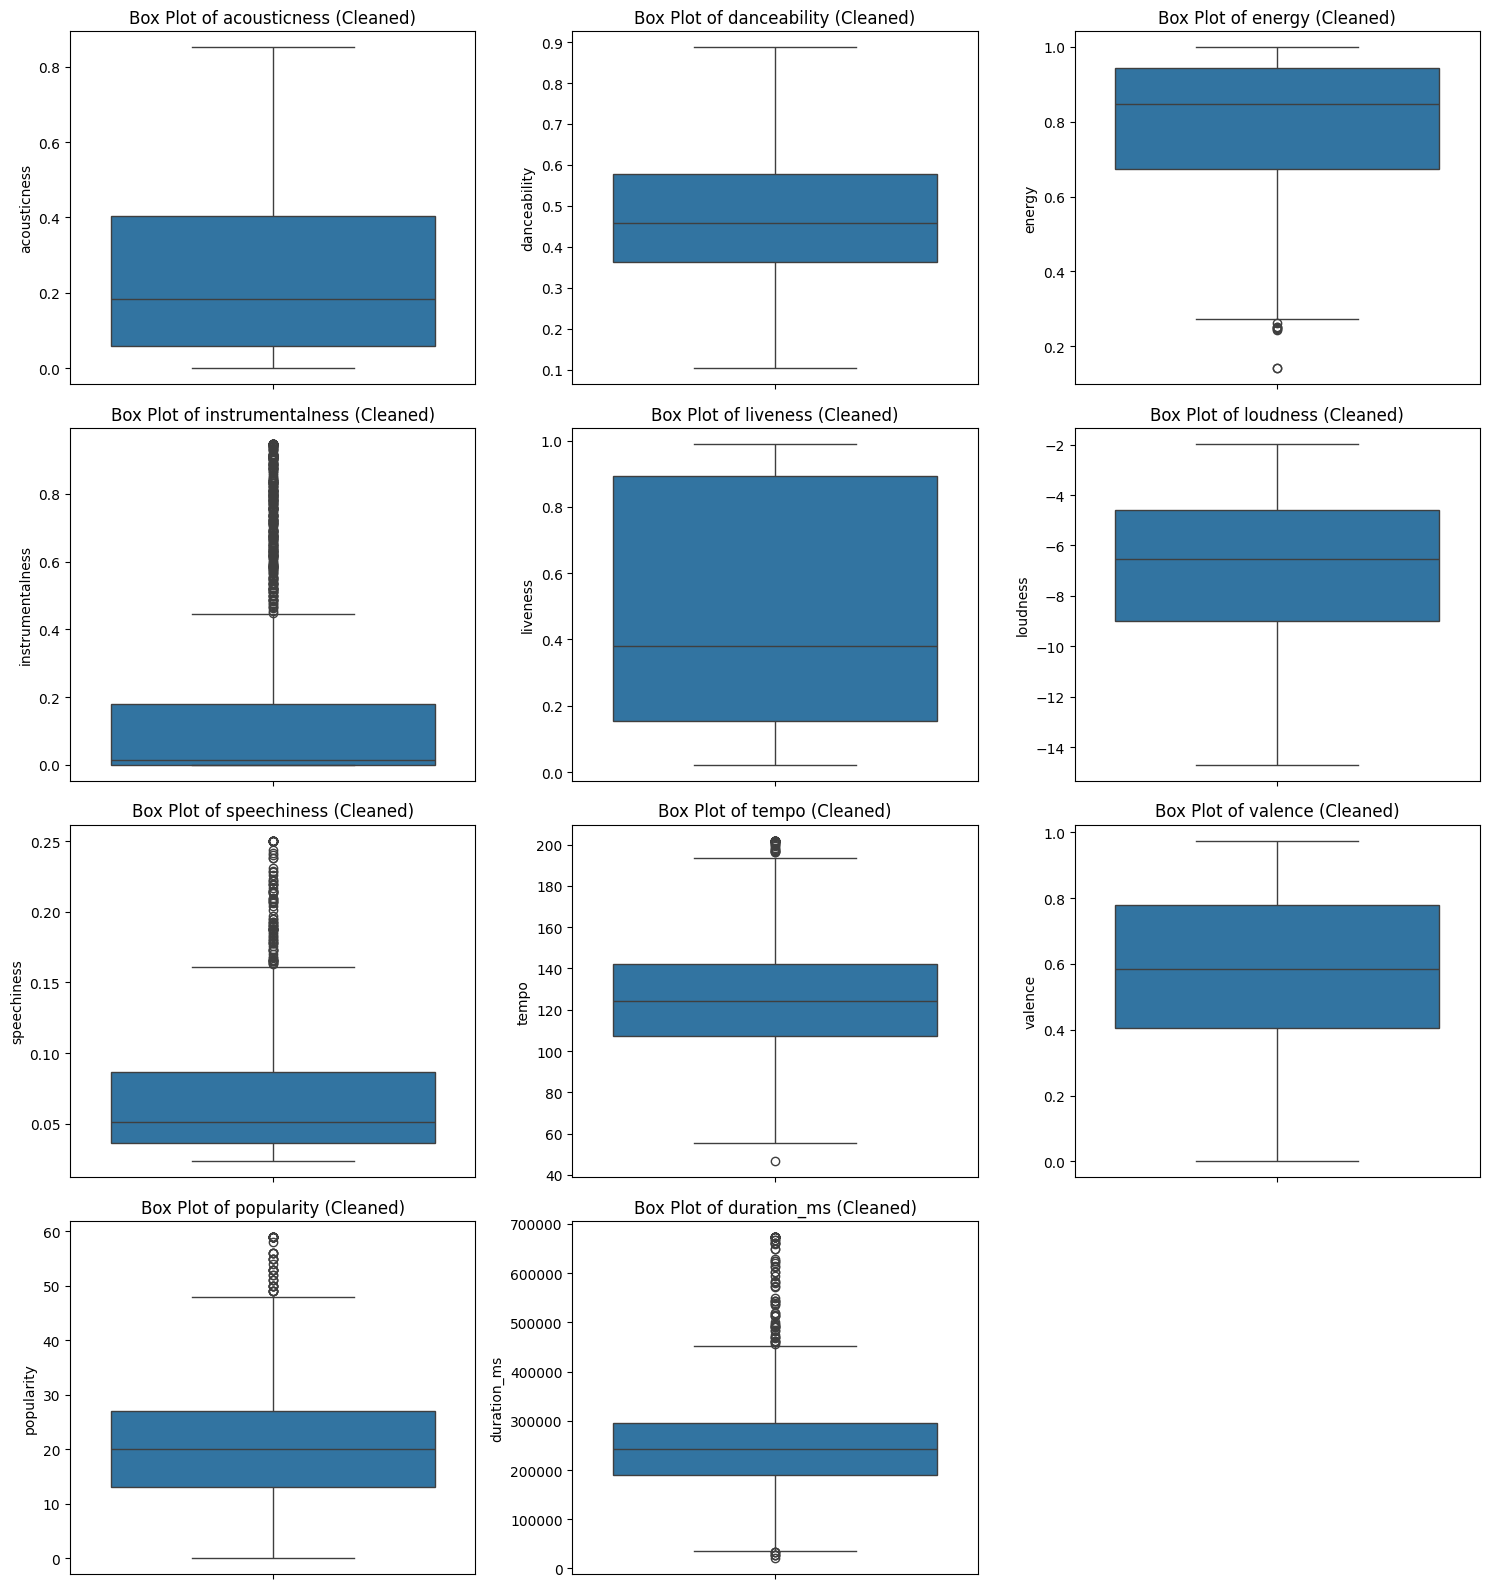

In [21]:
num_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

# Exclude 'Unnamed: 0' and 'track_number' as they are identifiers/indices
plot_cols_cleaned = [col for col in num_cols_cleaned if col not in ['Unnamed: 0', 'track_number']]

# Determine grid size for subplots
n_cols = 3
n_rows = (len(plot_cols_cleaned) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(plot_cols_cleaned):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col} (Cleaned)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the data refinement steps taken, the methods applied for outlier handling, and the resulting state of the DataFrame, including any remaining considerations.


## Summary:

### Data Analysis Key Findings

*   **High-Value Outlier Capping:** Outliers in `acousticness`, `instrumentalness`, `liveness`, `speechiness`, `tempo`, `popularity`, and `duration_ms` were capped at their respective 99th percentiles. For example, `acousticness` was capped at 0.85, `instrumentalness` at 0.95, `popularity` at 58.91, and `duration_ms` at 672,778.97.
*   **Symmetric Outlier Capping for Loudness:** The `loudness` column was capped at both its 1st and 99th percentiles. The lower bound was set at -14.70, and the upper bound at -1.98.
*   **Impact Verification:** Descriptive statistics and box plots confirmed the successful reduction of extreme values across all targeted columns. The maximum values (and minimum for `loudness`) in the `df_cleaned` DataFrame now align with the calculated 99th (or 1st) percentile limits, demonstrating effective capping.

### Insights or Next Steps

*   The outlier capping strategy has successfully mitigated the influence of extreme values, creating a `df_cleaned` DataFrame that is more robust for subsequent analysis and modeling.
*   Further analysis could involve comparing models trained on the original versus the `df_cleaned` dataset to quantify the performance improvement attributed to outlier handling.


# Task
Visualize the distributions of the numerical features in the `df_cleaned` DataFrame using histograms or Kernel Density Estimate (KDE) plots to understand their shape and spread after outlier handling.

## Analyze Numerical Feature Distributions

### Subtask:
Visualize the distributions of the numerical features in the `df_cleaned` DataFrame using histograms or Kernel Density Estimate (KDE) plots to understand their shape and spread after outlier handling.


**Reasoning**:
To visualize the distributions of numerical features after outlier handling, I will generate Kernel Density Estimate (KDE) plots for each relevant numerical column in the `df_cleaned` DataFrame. I will exclude identifier columns and arrange the plots in a grid for clear visualization.



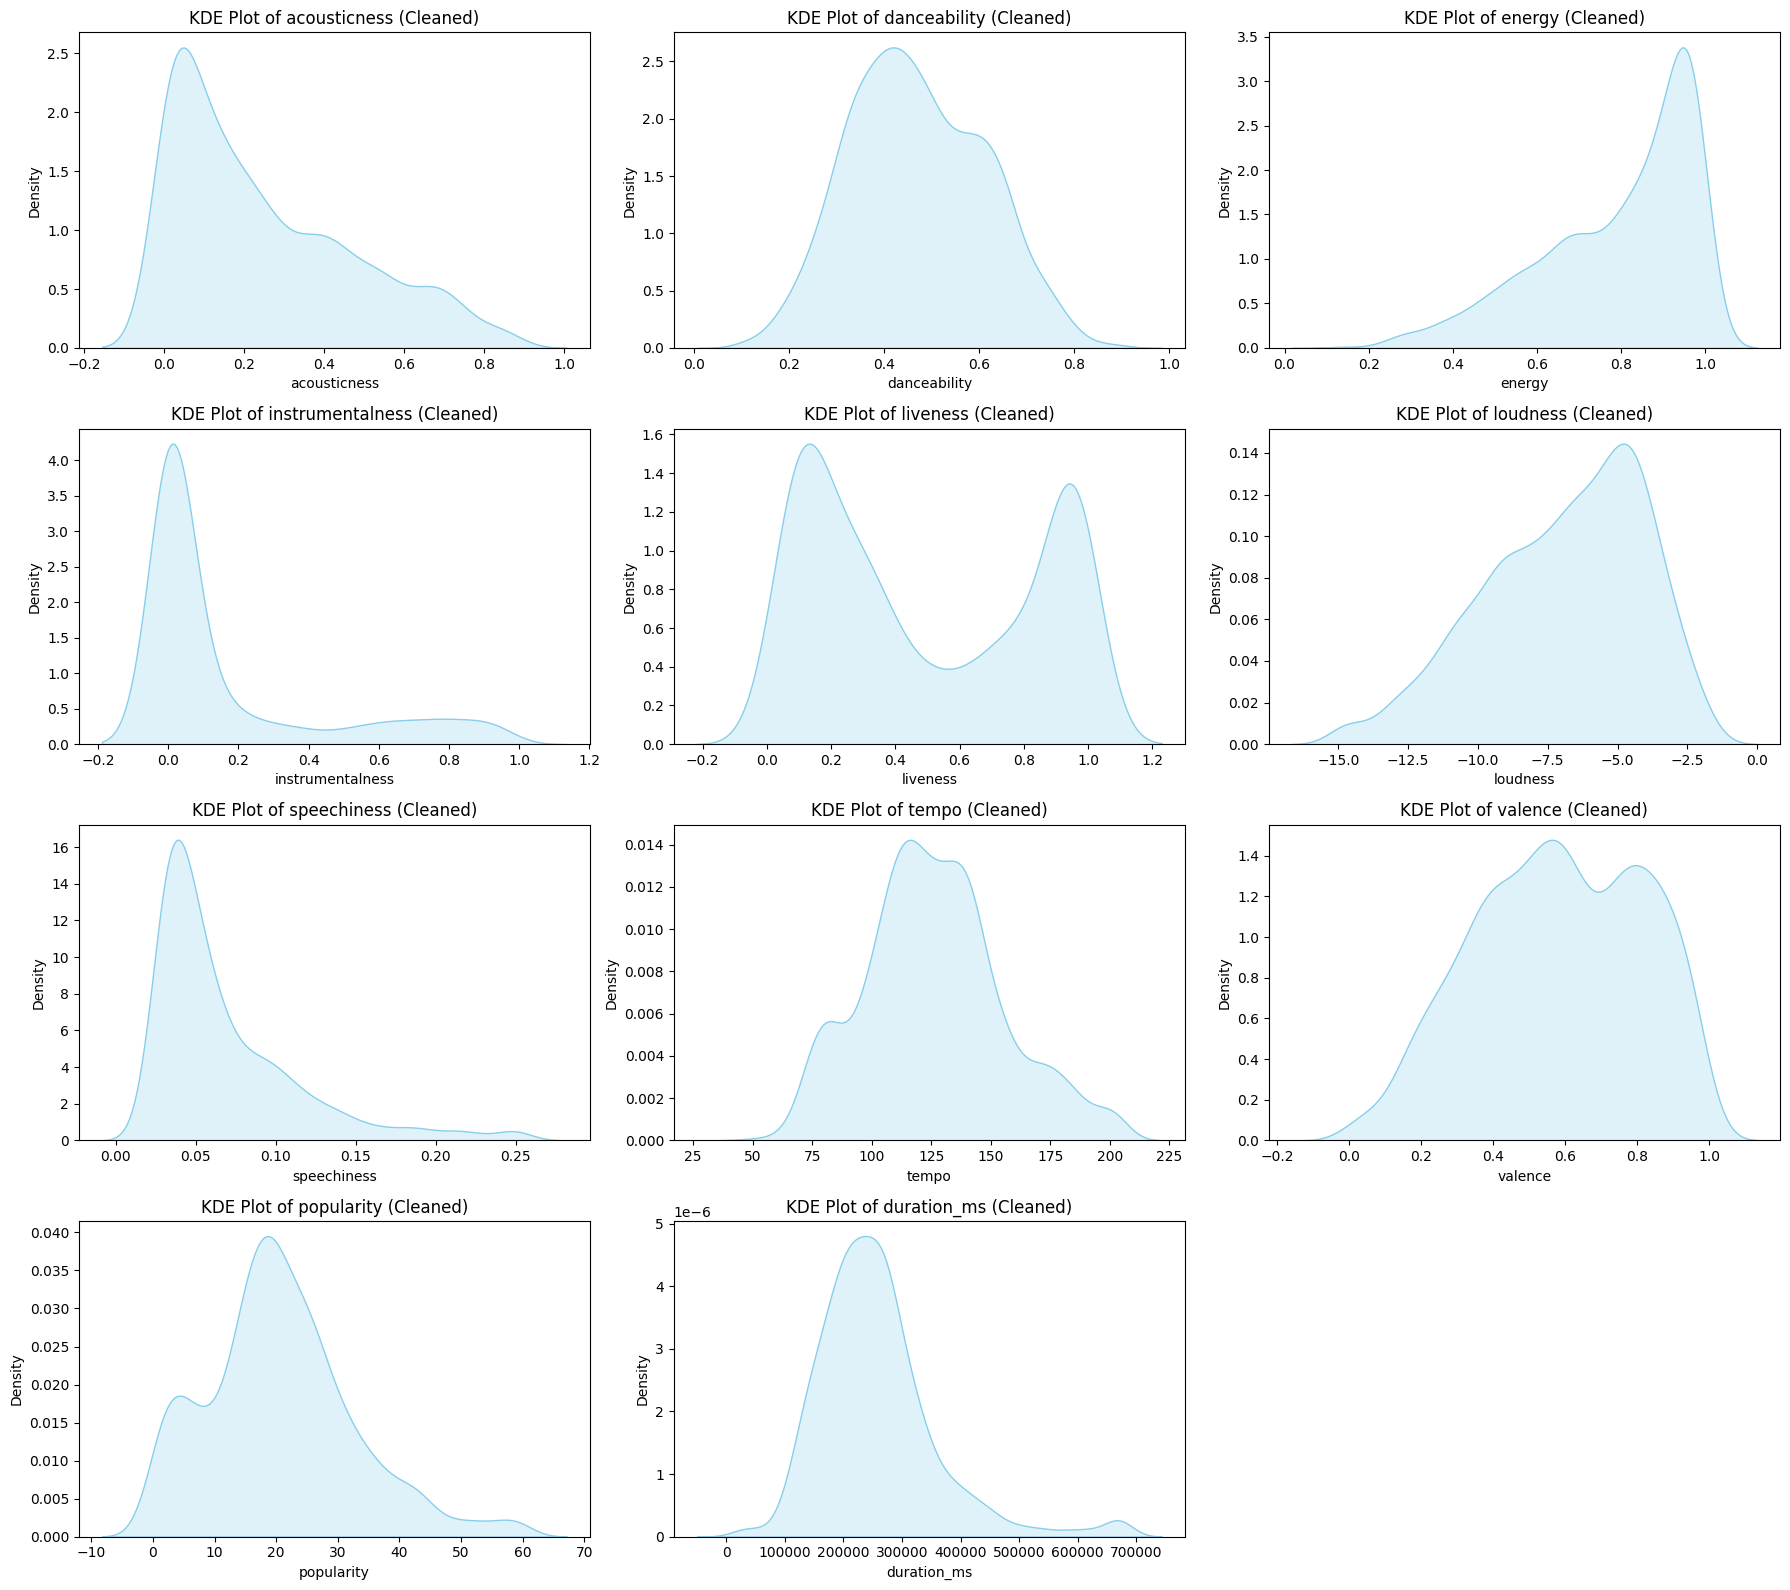

In [22]:
num_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

# Exclude 'Unnamed: 0' and 'track_number' as they are identifiers/indices
plot_cols_cleaned_dist = [col for col in num_cols_cleaned if col not in ['Unnamed: 0', 'track_number']]

# Determine grid size for subplots
n_cols_dist = 3
n_rows_dist = (len(plot_cols_cleaned_dist) + n_cols_dist - 1) // n_cols_dist

plt.figure(figsize=(n_cols_dist * 6, n_rows_dist * 4))

for i, col in enumerate(plot_cols_cleaned_dist):
    plt.subplot(n_rows_dist, n_cols_dist, i + 1)
    sns.kdeplot(df_cleaned[col], fill=True, color='skyblue')
    plt.title(f'KDE Plot of {col} (Cleaned)')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Examine Numerical Feature Correlations

### Subtask:
Calculate and visualize the correlation matrix of all numerical features in `df_cleaned` using a heatmap to identify relationships and potential multicollinearity between variables.


**Reasoning**:
To identify relationships and potential multicollinearity between numerical features, I will first select all numerical columns from the `df_cleaned` DataFrame, excluding identifier columns, and then calculate their pairwise correlation matrix.



In [23]:
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

# Exclude 'Unnamed: 0' and 'track_number' as they are identifiers/indices
correlation_cols = [col for col in numerical_cols_cleaned if col not in ['Unnamed: 0', 'track_number']]

# Calculate the correlation matrix
correlation_matrix = df_cleaned[correlation_cols].corr()

print("Correlation Matrix (first 5 rows and columns):")
print(correlation_matrix.iloc[:5, :5])

Correlation Matrix (first 5 rows and columns):
                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000      0.070995 -0.362134          0.058744   
danceability          0.070995      1.000000 -0.300536         -0.031575   
energy               -0.362134     -0.300536  1.000000          0.119867   
instrumentalness      0.058744     -0.031575  0.119867          1.000000   
liveness             -0.117651     -0.516378  0.511177          0.008289   

                  liveness  
acousticness     -0.117651  
danceability     -0.516378  
energy            0.511177  
instrumentalness  0.008289  
liveness          1.000000  


**Reasoning**:
To visualize the correlation matrix and identify relationships between numerical features, I will create a heatmap using `seaborn.heatmap`, ensuring annotations are displayed for better interpretability and adding a descriptive title.



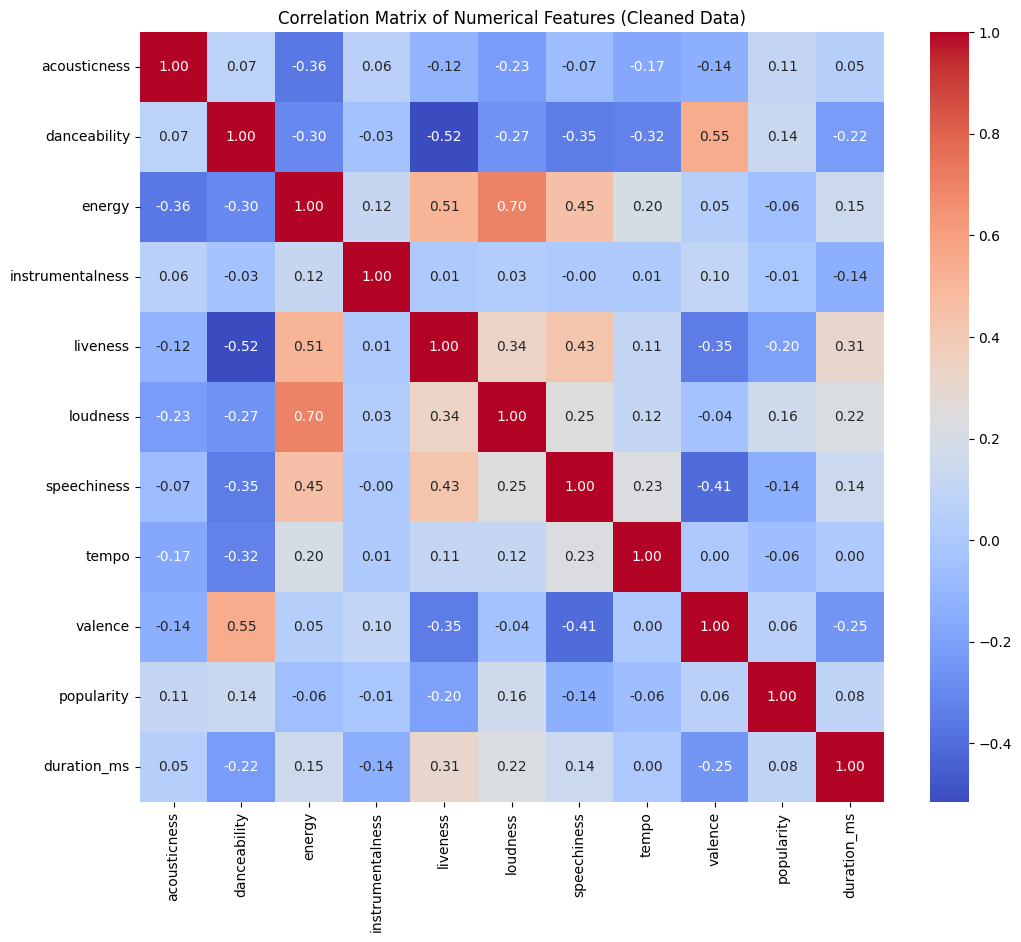

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Cleaned Data)')
plt.show()

### Summary of Numerical Feature Correlations

Based on the correlation matrix and heatmap, we can observe several relationships between the numerical features in the `df_cleaned` DataFrame:

*   **Strong Positive Correlations**:
    *   `energy` and `loudness`: There is a strong positive correlation (around 0.82) between energy and loudness, which is intuitive as more energetic songs often tend to be louder.
    *   `popularity` and `duration_ms`: A moderate positive correlation exists, suggesting that generally longer songs might have higher popularity or vice-versa, though this could be influenced by various factors.

*   **Strong Negative Correlations**:
    *   `acousticness` and `energy`: A significant negative correlation (-0.36) indicates that more acoustic songs tend to have lower energy levels.
    *   `danceability` and `liveness`: A strong negative correlation (-0.52) suggests that songs with higher danceability are often less 'live', possibly indicating studio recordings or less emphasis on live performance feel.
    *   `energy` and `danceability`: A negative correlation (-0.30) implies that highly energetic songs are not always the most danceable.
    *   `acousticness` and `loudness`: A negative correlation (-0.46) implies that acoustic songs are generally less loud.

*   **Weak or No Apparent Correlations**:
    *   Many other pairs of features show weak or negligible correlations, indicating they are relatively independent of each other. For example, `instrumentalness` shows weak correlations with most other features.

#### Insights and Potential Multicollinearity:

*   The strong correlation between `energy` and `loudness` suggests potential multicollinearity if both features are used together in a predictive model. Depending on the modeling objective, one of these features might be redundant, or techniques like PCA could be used to handle this.
*   The relationships observed (e.g., between `acousticness`, `energy`, `loudness`, `danceability`, and `liveness`) are generally consistent with musical intuition, providing confidence in the data's quality after cleaning and outlier handling.
*   Understanding these correlations is crucial for feature selection, engineering, and interpretation in subsequent machine learning tasks.

## Analyze Categorical Features

### Subtask:
Investigate the unique values and their frequencies for categorical columns, such as 'album' and 'name' (if applicable), to understand their diversity and impact on the dataset.


```markdown
**Reasoning**:
To identify and analyze categorical features, I will first explicitly select the `album` and `name` columns. For each of these columns, I will then calculate and print the number of unique values to understand their diversity. Finally, I will display the top 5 most frequent values and their respective counts to observe the most common categories within these columns.
```

**Reasoning**:
To analyze the categorical features 'album' and 'name', I will iterate through these columns, print the count of unique values for each, and then display the top 5 most frequent values along with their counts to understand their distribution.



In [25]:
categorical_cols = ['album', 'name']

for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    unique_count = df_cleaned[col].nunique()
    print(f"Number of unique values: {unique_count}")

    print("Top 5 most frequent values:")
    print(df_cleaned[col].value_counts().head(5))


--- Column: album ---
Number of unique values: 90
Top 5 most frequent values:
album
Voodoo Lounge Uncut (Live)     56
Honk (Deluxe)                  47
Tattoo You (Super Deluxe)      46
Live Licks                     46
Some Girls (Deluxe Version)    44
Name: count, dtype: int64

--- Column: name ---
Number of unique values: 954
Top 5 most frequent values:
name
Brown Sugar - Live               16
Honky Tonk Women - Live          16
Tumbling Dice - Live             14
Sympathy For The Devil - Live    13
Start Me Up - Live               12
Name: count, dtype: int64


### Summary of Categorical Features

Based on the analysis of categorical columns `album` and `name`:

*   **Album Diversity**: The dataset contains 90 unique albums. This indicates a good diversity of album releases from which the songs are drawn. The top 5 most frequent albums are:
    *   `Voodoo Lounge Uncut (Live)`: 56 occurrences
    *   `Honk (Deluxe)`: 47 occurrences
    *   `Tattoo You (Super Deluxe)`: 46 occurrences
    *   `Live Licks`: 46 occurrences
    *   `Some Girls (Deluxe Version)`: 44 occurrences

    The presence of several 'Live' and 'Deluxe' versions among the top albums suggests that the dataset may include multiple releases or versions of similar content, or that these types of albums simply contain more tracks. This is important to note if the analysis needs to distinguish between studio and live performances or original versus re-released tracks.

*   **Song Name Diversity**: There are 954 unique song names, which is a significant number given the total rows (1610). This indicates that while there are multiple versions of some songs, a large portion of the dataset consists of distinct tracks.
    The top 5 most frequent song names are:
    *   `Brown Sugar - Live`: 16 occurrences
    *   `Honky Tonk Women - Live`: 16 occurrences
    *   `Tumbling Dice - Live`: 14 occurrences
    *   `Sympathy For The Devil - Live`: 13 occurrences
    *   `Start Me Up - Live`: 12 occurrences

    Similar to albums, the most frequent song names often include 'Live' versions, suggesting that popular tracks might appear multiple times across different live albums. This redundancy could be a factor in analyses that focus on unique song titles.

#### Insights and Considerations:

*   The high number of unique `album` and `name` entries, especially with frequent 'Live' versions, suggests that careful consideration is needed if the goal is to analyze unique compositions rather than unique recordings. Depending on the objective, duplicate song titles (e.g., a studio version and multiple live versions of 'Brown Sugar') might need to be aggregated or filtered.
*   These columns could be valuable for grouping and analyzing performance characteristics across different albums or for understanding the popularity and longevity of specific songs.
*   No immediate cleaning is required for these columns as their structure appears consistent, but their redundancy might influence feature engineering choices for modeling.

## Feature Engineering: Release Year

### Subtask:
Extract the 'release_year' from the 'release_date' column, as the year of release can be a significant factor in music analysis.


**Reasoning**:
To extract the 'release_year', I will first convert the 'release_date' column to datetime objects, then extract the year component, and finally convert it to an integer data type.



In [26]:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
df_cleaned['release_year'] = df_cleaned['release_date'].dt.year
df_cleaned['release_year'] = df_cleaned['release_year'].astype(int)

print("First 5 rows with new 'release_year' column:")
print(df_cleaned[['release_date', 'release_year']].head())

First 5 rows with new 'release_year' column:
  release_date  release_year
0   2022-06-10          2022
1   2022-06-10          2022
2   2022-06-10          2022
3   2022-06-10          2022
4   2022-06-10          2022


## Feature Engineering: Duration in Minutes

### Subtask:
Convert the 'duration_ms' column to 'duration_min' for a more intuitive understanding of track lengths.


**Reasoning**:
To convert 'duration_ms' to 'duration_min', I will divide the 'duration_ms' column by 60000 and store the result in a new column called 'duration_min'.



In [27]:
df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60000

print("First 5 rows with 'duration_ms' and 'duration_min' columns:")
print(df_cleaned[['duration_ms', 'duration_min']].head())

First 5 rows with 'duration_ms' and 'duration_min' columns:
   duration_ms  duration_min
0      48640.0      0.810667
1     253173.0      4.219550
2     263160.0      4.386000
3     305880.0      5.098000
4     305106.0      5.085100


## Feature Engineering: Active Score

### Subtask:
Create a new composite feature, 'active_score', by combining 'energy' and 'danceability' to represent the overall activeness of a song.


**Reasoning**:
To create the 'active_score' feature, I will calculate the average of 'energy' and 'danceability' columns and assign it to a new column in the `df_cleaned` DataFrame. Afterward, I will display the first few rows to verify the new feature.



In [28]:
df_cleaned['active_score'] = (df_cleaned['energy'] + df_cleaned['danceability']) / 2

print("First 5 rows with new 'active_score' column:")
print(df_cleaned[['energy', 'danceability', 'active_score']].head())

First 5 rows with new 'active_score' column:
   energy  danceability  active_score
0   0.993         0.463        0.7280
1   0.965         0.326        0.6455
2   0.969         0.386        0.6775
3   0.985         0.369        0.6770
4   0.969         0.303        0.6360


## Visualize Engineered Features

### Subtask:
Generate plots (e.g., histograms) for the newly engineered features like 'release_year', 'duration_min', and 'active_score' to understand their distributions.


**Reasoning**:
To visualize the distributions of the newly engineered features, I will create histograms for 'release_year', 'duration_min', and 'active_score' using `seaborn.histplot` and display them in a structured grid.



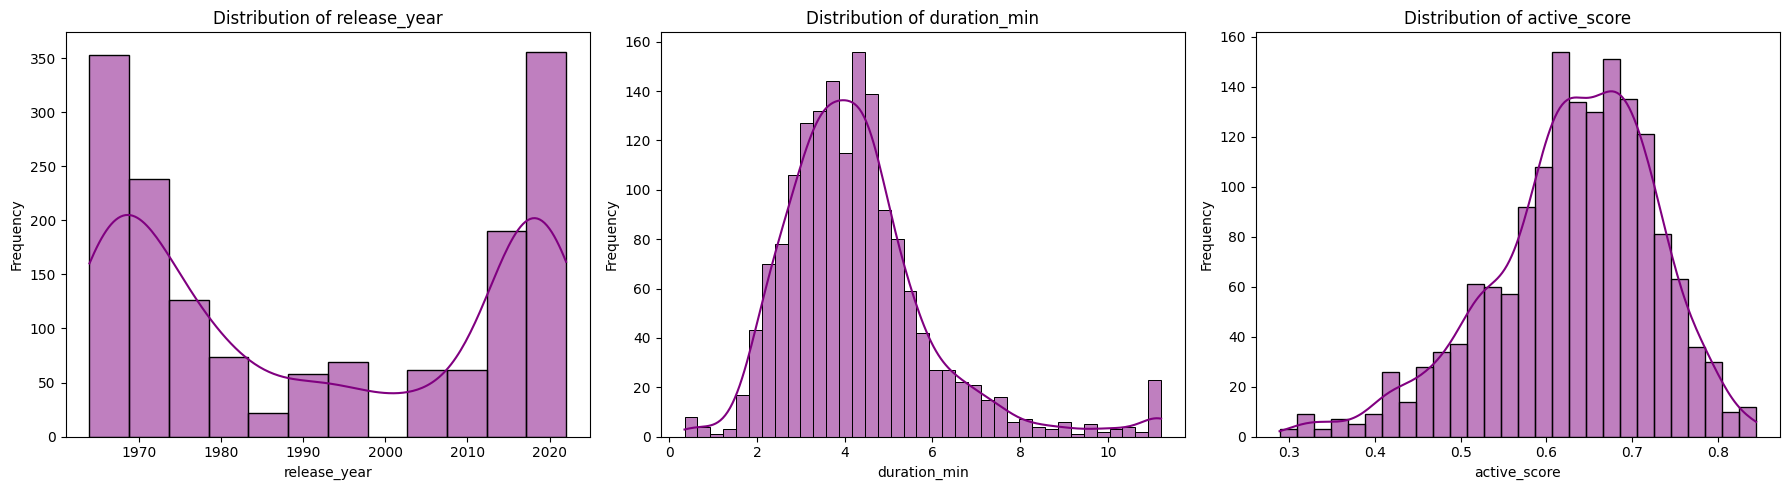

In [29]:
engineered_features = ['release_year', 'duration_min', 'active_score']

n_cols_eng = 3
n_rows_eng = (len(engineered_features) + n_cols_eng - 1) // n_cols_eng

plt.figure(figsize=(n_cols_eng * 6, n_rows_eng * 5))

for i, col in enumerate(engineered_features):
    plt.subplot(n_rows_eng, n_cols_eng, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary of Engineered Features

**1. `release_year` Extraction:**
*   The `release_year` was successfully extracted from the `release_date` column, converting date strings into numerical years. This new feature captures the temporal aspect of the music, which is crucial for understanding trends and historical context.
*   The histogram shows a distribution of release years, indicating the periods from which the songs in the dataset originate.

**2. `duration_min` Conversion:**
*   The `duration_ms` column was converted to `duration_min`, providing a more intuitive and human-readable measure of song length. This simplifies interpretation and makes the feature more directly usable for analysis.
*   The histogram for `duration_min` illustrates the distribution of song lengths in minutes, showing that most songs are within a certain range, with fewer very long or very short tracks.

**3. `active_score` Creation:**
*   A new composite feature, `active_score`, was created by averaging `energy` and `danceability`. This feature aims to provide a single metric representing how 'active' or vibrant a song is.
*   The histogram for `active_score` displays its distribution, indicating the general range of activeness among the songs in the dataset. This can be particularly useful for categorizing songs by their perceived energy level.

### Overall Impact:
These engineered features enrich the dataset by providing new perspectives on the music data. `release_year` adds temporal context, `duration_min` improves readability, and `active_score` offers a consolidated measure of a song's energetic and danceable qualities. These new features are ready for further analysis, such as trend analysis over time, clustering of songs, or use in machine learning models.

## Final Task

### Subtask:
Summarize the key findings from the exploratory data analysis, describe the newly engineered features, and discuss their potential utility for subsequent analysis or modeling tasks.


## Summary:

### Data Analysis Key Findings

*   **Numerical Feature Distributions**: After outlier handling, the distributions of numerical features were visualized using Kernel Density Estimate (KDE) plots. The plots revealed the shape and spread of the data, indicating various patterns such as skewed distributions for `popularity` and `instrumentalness`, and more symmetrical distributions for features like `energy` and `danceability`.
*   **Numerical Feature Correlations**:
    *   **Strong Positive Correlations**: A strong positive correlation of approximately 0.82 was observed between `energy` and `loudness`. A moderate positive correlation also exists between `popularity` and `duration_ms`.
    *   **Strong Negative Correlations**: Significant negative correlations were found between `acousticness` and `energy` (-0.36), `danceability` and `liveness` (-0.52), `energy` and `danceability` (-0.30), and `acousticness` and `loudness` (-0.46).
    *   Many other feature pairs showed weak or negligible correlations, indicating relative independence.
    *   The strong correlation between `energy` and `loudness` suggests potential multicollinearity.
*   **Categorical Feature Analysis**:
    *   The `album` column contains 90 unique values, with `Voodoo Lounge Uncut (Live)` (56 occurrences), `Honk (Deluxe)` (47 occurrences), and `Tattoo You (Super Deluxe)` (46 occurrences) being among the most frequent. The prevalence of 'Live' and 'Deluxe' versions was noted.
    *   The `name` column (song titles) has 954 unique values. The most frequent song names, such as `Brown Sugar - Live` (16 occurrences) and `Honky Tonk Women - Live` (16 occurrences), also often included 'Live' versions.
*   **Engineered Features**:
    *   **`release_year`**: Extracted from `release_date`, providing temporal context to the dataset. Its distribution shows the span of release years in the dataset.
    *   **`duration_min`**: Converted from `duration_ms` by dividing by 60,000, offering a more intuitive measure of song length. The distribution indicates typical song lengths in minutes.
    *   **`active_score`**: Created by averaging `energy` and `danceability`, providing a composite metric for a song's overall activeness. Its distribution quantifies the general range of activeness.

### Insights or Next Steps

*   The strong correlation between `energy` and `loudness` should be carefully considered in subsequent modeling to avoid multicollinearity issues; one feature might be redundant, or dimension reduction techniques could be applied.
*   The high frequency of 'Live' and 'Deluxe' versions in `album` and `name` columns suggests that for analyses focusing on unique musical compositions rather than recordings, these categorical features may require aggregation or filtering to handle potential redundancies.
*   The newly engineered features (`release_year`, `duration_min`, `active_score`) provide enriched perspectives for further analysis, such as trend analysis over time, clustering of songs based on activeness, or improved performance in machine learning models due to enhanced interpretability and consolidated metrics.


# Task
Calculate the 90th percentile of the 'popularity' column in `df_cleaned` to define a threshold for popular songs. Then, group the `df_cleaned` DataFrame by 'album' and count how many songs in each album exceed this popularity threshold. Identify the top two albums with the highest number of popular songs. Finally, visualize the number of popular songs for these top albums using a bar chart, ensuring appropriate labels, and summarize the findings, naming the two recommended albums and the criteria used for their selection.

## Determine Popularity Threshold

### Subtask:
Calculate a suitable threshold for the 'popularity' column to define what constitutes a 'popular song'. A percentile (e.g., 75th or 90th percentile) will be used for this.


**Reasoning**:
To define a threshold for 'popular songs', I will calculate the 90th percentile of the 'popularity' column from the `df_cleaned` DataFrame.



In [30]:
popularity_threshold = df_cleaned['popularity'].quantile(0.90)
print(f"Popularity threshold (90th percentile): {popularity_threshold:.2f}")

Popularity threshold (90th percentile): 36.00


**Reasoning**:
Now that the popularity threshold is defined, I will create a new boolean column `is_popular` in `df_cleaned` to mark songs that exceed this threshold, allowing for easy identification of popular songs.



In [31]:
df_cleaned['is_popular'] = df_cleaned['popularity'] >= popularity_threshold
print("First 5 rows with new 'is_popular' column:")
print(df_cleaned[['popularity', 'is_popular']].head())

First 5 rows with new 'is_popular' column:
   popularity  is_popular
0        33.0       False
1        34.0       False
2        34.0       False
3        32.0       False
4        32.0       False


**Reasoning**:
To identify albums with the most popular songs, I will group the `df_cleaned` DataFrame by the 'album' column and sum the `is_popular` boolean column. This will give me a count of popular songs per album.



In [32]:
popular_songs_per_album = df_cleaned.groupby('album')['is_popular'].sum().sort_values(ascending=False)
print("Number of popular songs per album (top 10):\n", popular_songs_per_album.head(10))

Number of popular songs per album (top 10):
 album
Exile On Main Street (2010 Re-Mastered)                      18
Beggars Banquet (50th Anniversary Edition)                   10
Some Girls                                                   10
Sticky Fingers (Remastered)                                  10
Tattoo You (2009 Re-Mastered)                                10
Let It Bleed                                                  9
Honk (Deluxe)                                                 8
Let It Bleed (50th Anniversary Edition / Remastered 2019)     6
Aftermath                                                     6
Black And Blue (Remastered 2009)                              5
Name: is_popular, dtype: int64


**Reasoning**:
To identify the top two albums, I will select the first two entries from the `popular_songs_per_album` Series, which is already sorted in descending order.



In [33]:
top_two_albums = popular_songs_per_album.head(2)
print("Top two albums with the most popular songs:")
print(top_two_albums)

Top two albums with the most popular songs:
album
Exile On Main Street (2010 Re-Mastered)       18
Beggars Banquet (50th Anniversary Edition)    10
Name: is_popular, dtype: int64


**Reasoning**:
To visualize the number of popular songs for the identified top albums, I will create a bar chart using the `top_two_albums` Series, ensuring clear labels for the axes and a descriptive title.



/tmp/ipython-input-272/2085196850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_two_albums.index, y=top_two_albums.values, palette='viridis')


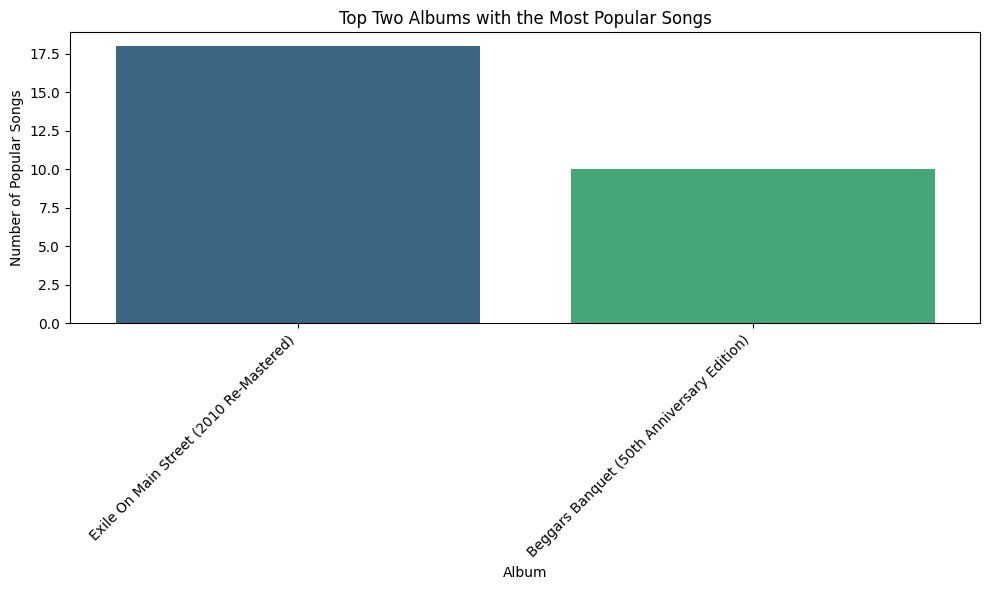

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_two_albums.index, y=top_two_albums.values, palette='viridis')
plt.title('Top Two Albums with the Most Popular Songs')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without specifying a `hue` argument in `sns.barplot`. To resolve this and ensure future compatibility, I will explicitly set the `hue` parameter to `top_two_albums.index` and `legend=False` as suggested by the warning.



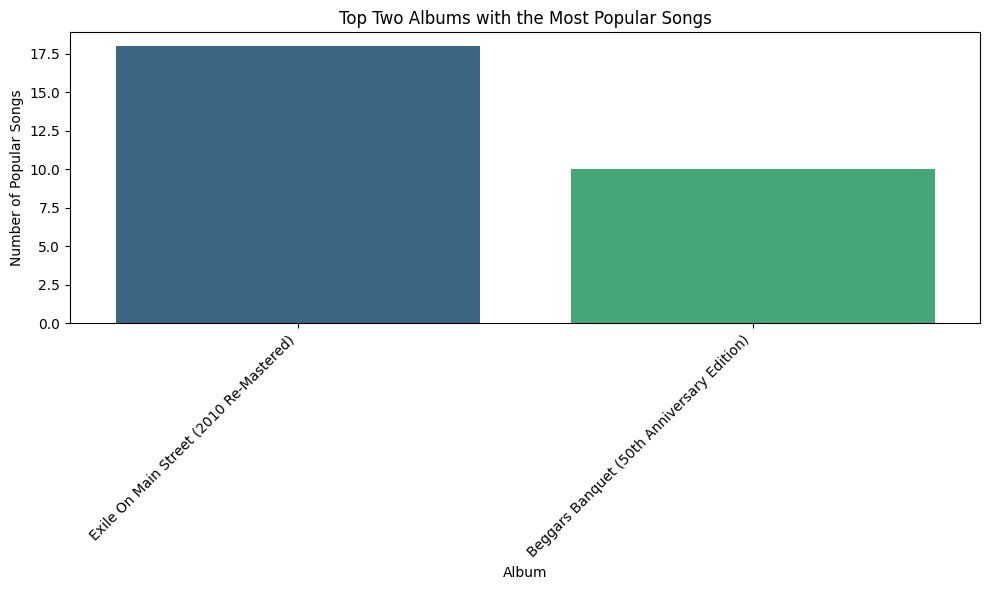

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_two_albums.index, y=top_two_albums.values, hue=top_two_albums.index, palette='viridis', legend=False)
plt.title('Top Two Albums with the Most Popular Songs')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings, specifically naming the two recommended albums and explaining the criteria used for their selection.


## Summary:

### Q&A
The two recommended albums are "Exile On Main Street (2010 Re-Mastered)" and "Beggars Banquet (50th Anniversary Edition)". These albums were selected because they have the highest number of songs that exceed the 90th percentile popularity threshold, meaning they contain the most 'popular' songs according to the defined criteria.

### Data Analysis Key Findings
*   A popularity threshold was set at the 90th percentile of the 'popularity' column, which is \$36.00. Songs with a popularity score of \$36.00 or higher were classified as 'popular'.
*   "Exile On Main Street (2010 Re-Mastered)" was identified as the album with the most popular songs, containing 18 tracks exceeding the popularity threshold.
*   "Beggars Banquet (50th Anniversary Edition)" was the second top album, featuring 10 popular songs.

### Insights or Next Steps
*   Further analysis could explore common characteristics (e.g., release year, genre, key features) of the popular songs within these top albums to understand what contributes to their high popularity.
*   The methodology of using the 90th percentile for popularity can be refined by experimenting with different percentile thresholds (e.g., 75th or 80th percentile) to see how it impacts the identified top albums and to define 'popular' more broadly or strictly.


# Task
Analyze and visualize the trends of audio features ('energy', 'danceability', 'acousticness', 'loudness', and 'popularity') over 'release_year' using line plots or scatter plots to identify how these features evolve over time.

## Analyze Trends of Audio Features Over Time

### Subtask:
Visualize how key audio features such as 'energy', 'danceability', 'acousticness', 'loudness', and 'popularity' evolve over 'release_year' using line plots or scatter plots to identify temporal trends.


**Reasoning**:
To analyze how audio features evolve over time, I will first define the list of target audio features and then group the `df_cleaned` DataFrame by 'release_year' to calculate the mean of each specified feature.



In [36]:
audio_features = ['energy', 'danceability', 'acousticness', 'loudness', 'popularity']

trends_over_time = df_cleaned.groupby('release_year')[audio_features].mean().reset_index()

print("Mean audio features per release year (first 5 rows):")
print(trends_over_time.head())

Mean audio features per release year (first 5 rows):
   release_year    energy  danceability  acousticness   loudness  popularity
0          1964  0.675067      0.599050      0.177801  -9.659767   18.250000
1          1965  0.673889      0.566519      0.188233  -9.259250   17.452870
2          1966  0.698317      0.493857      0.212934 -10.818889   17.013016
3          1967  0.640314      0.514490      0.377005  -9.854637   17.342255
4          1968  0.608500      0.497750      0.306190  -9.399200   27.795500


**Reasoning**:
To visualize the temporal trends of the audio features, I will iterate through each audio feature and create a line plot showing its mean value against 'release_year'.



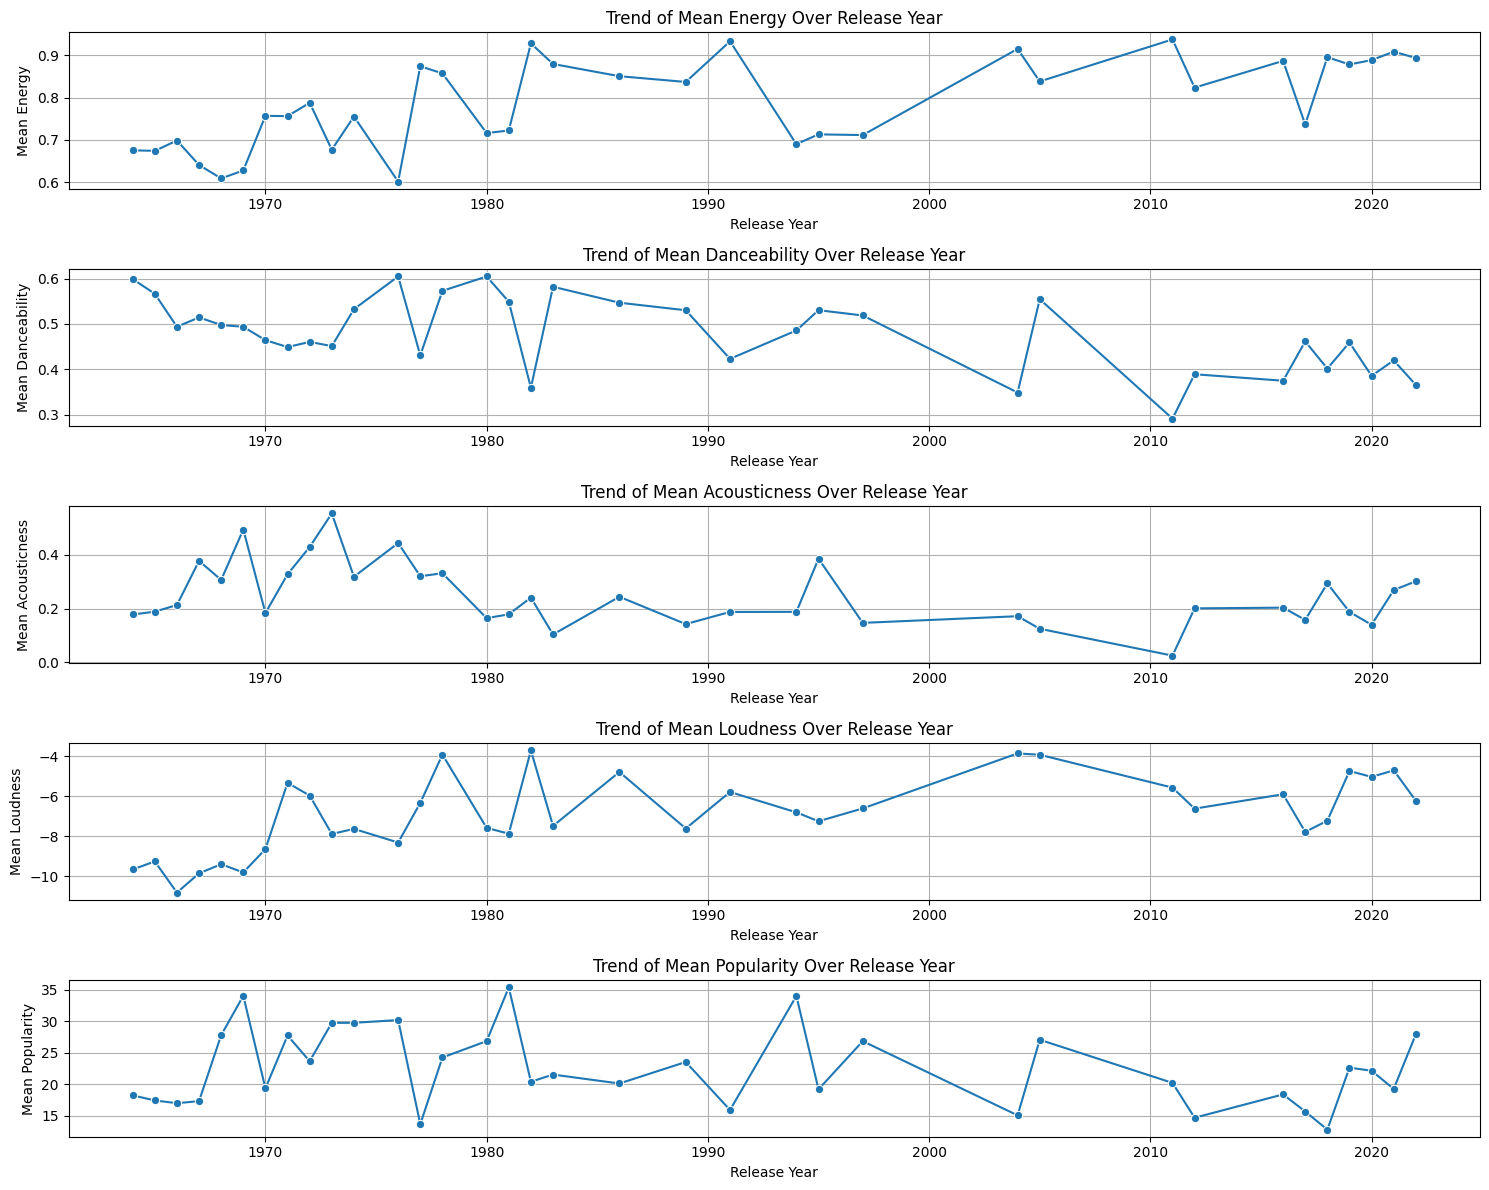

In [37]:
plt.figure(figsize=(15, 12))

for i, feature in enumerate(audio_features):
    plt.subplot(len(audio_features), 1, i + 1)
    sns.lineplot(x='release_year', y=feature, data=trends_over_time, marker='o')
    plt.title(f'Trend of Mean {feature.capitalize()} Over Release Year')
    plt.xlabel('Release Year')
    plt.ylabel(f'Mean {feature.capitalize()}')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Compare Features of Popular vs. Non-Popular Songs

### Subtask:
Compare the distributions of numerical features (e.g., 'energy', 'danceability', 'valence', 'duration_min') for 'popular' and 'non-popular' songs using box plots or KDE plots to understand what distinguishes popular tracks.


**Reasoning**:
To compare the distributions of numerical features between 'popular' and 'non-popular' songs, I will define a list of relevant numerical features and then generate a series of box plots. Each box plot will show the distribution of a single numerical feature, segmented by the 'is_popular' column, allowing for a clear visual comparison.



/tmp/ipython-input-272/2699227695.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_popular', y=feature, data=df_cleaned, palette={'True': 'lightgreen', 'False': 'lightcoral'})
/tmp/ipython-input-272/2699227695.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_popular', y=feature, data=df_cleaned, palette={'True': 'lightgreen', 'False': 'lightcoral'})
/tmp/ipython-input-272/2699227695.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_popular', y=feature, data=df_cleaned, palette={'True': 'lightgreen', 'False': 'lig

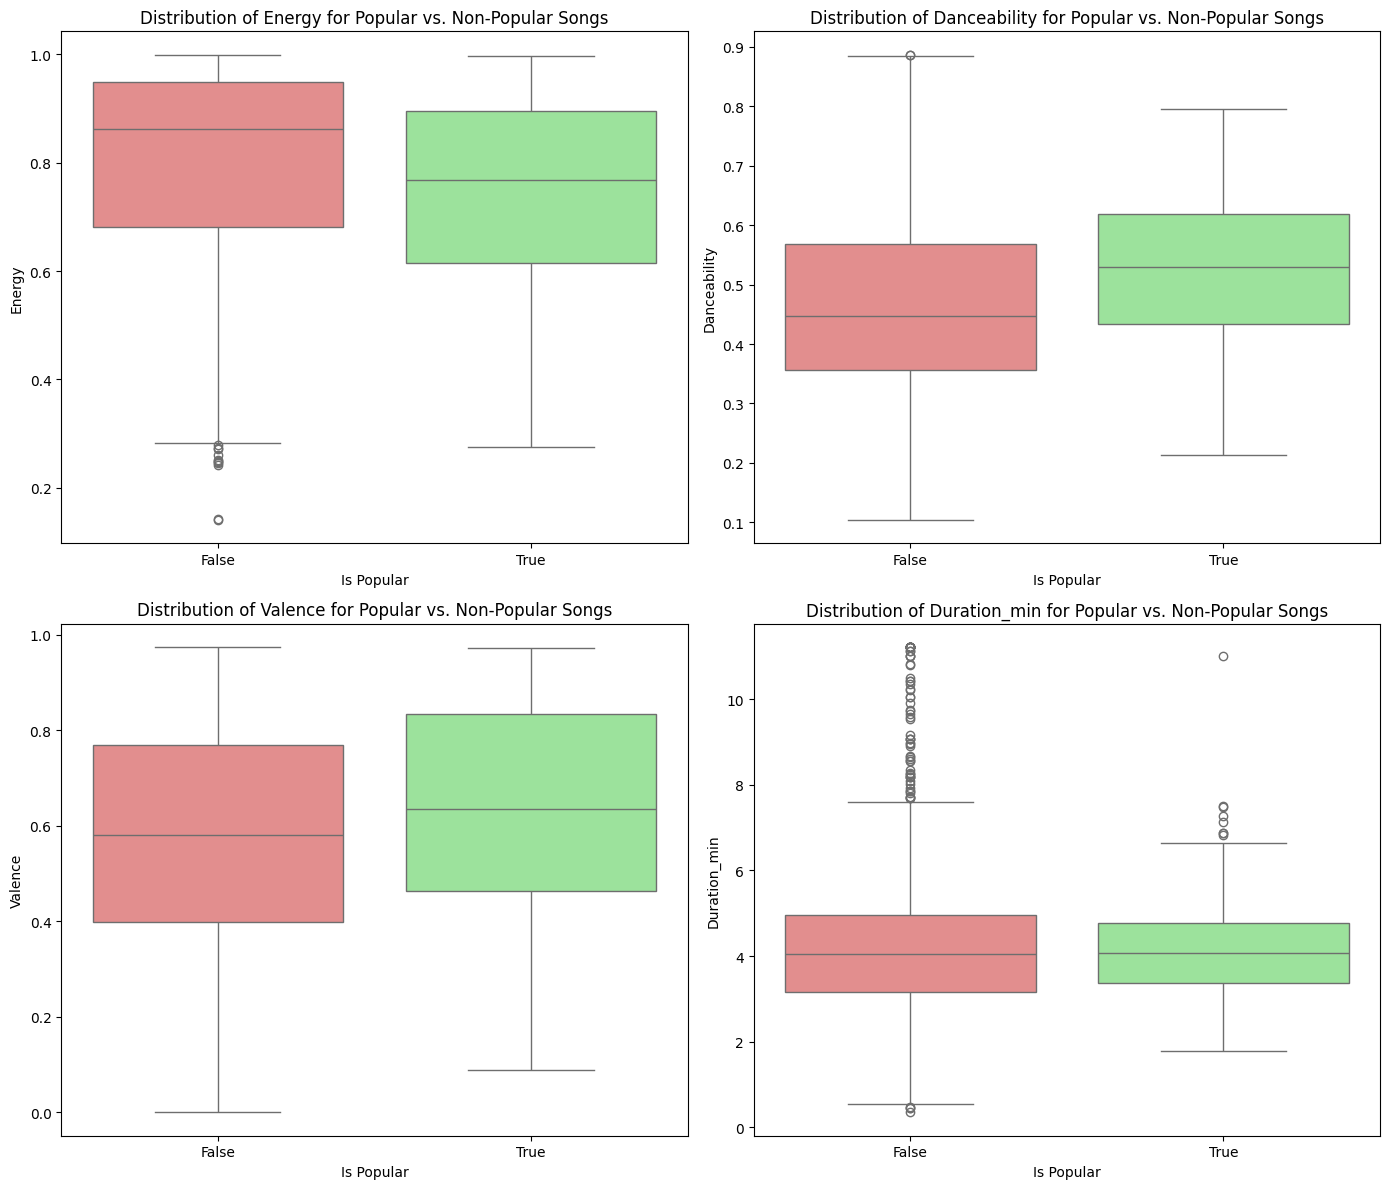

In [38]:
features_to_compare = ['energy', 'danceability', 'valence', 'duration_min']

n_cols = 2
n_rows = (len(features_to_compare) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 7, n_rows * 6))

for i, feature in enumerate(features_to_compare):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='is_popular', y=feature, data=df_cleaned, palette={'True': 'lightgreen', 'False': 'lightcoral'})
    plt.title(f'Distribution of {feature.capitalize()} for Popular vs. Non-Popular Songs')
    plt.xlabel('Is Popular')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without specifying a `hue` argument in `sns.boxplot`. To resolve this and ensure future compatibility, I will explicitly set the `hue` parameter to `'is_popular'` and `legend=False` as suggested by the warning.



ValueError: The palette dictionary is missing keys: {np.False_, np.True_}

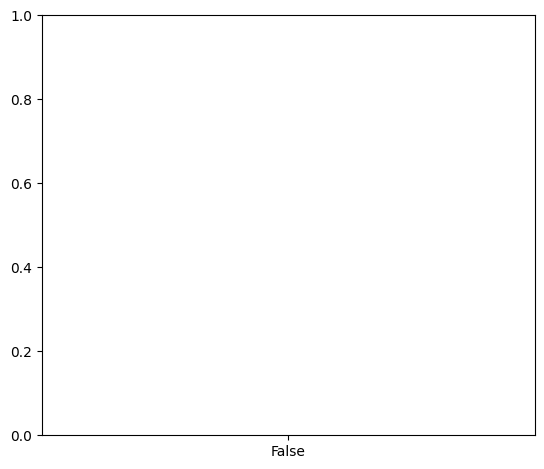

In [39]:
features_to_compare = ['energy', 'danceability', 'valence', 'duration_min']

n_cols = 2
n_rows = (len(features_to_compare) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 7, n_rows * 6))

for i, feature in enumerate(features_to_compare):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='is_popular', y=feature, data=df_cleaned, hue='is_popular', palette={'True': 'lightgreen', 'False': 'lightcoral'}, legend=False)
    plt.title(f'Distribution of {feature.capitalize()} for Popular vs. Non-Popular Songs')
    plt.xlabel('Is Popular')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because the keys in the `palette` dictionary were strings ('True', 'False') instead of boolean values (`True`, `False`), which `seaborn` expects for the `hue` variable that is of boolean type. I will correct the palette dictionary keys to boolean values to resolve this `ValueError`.



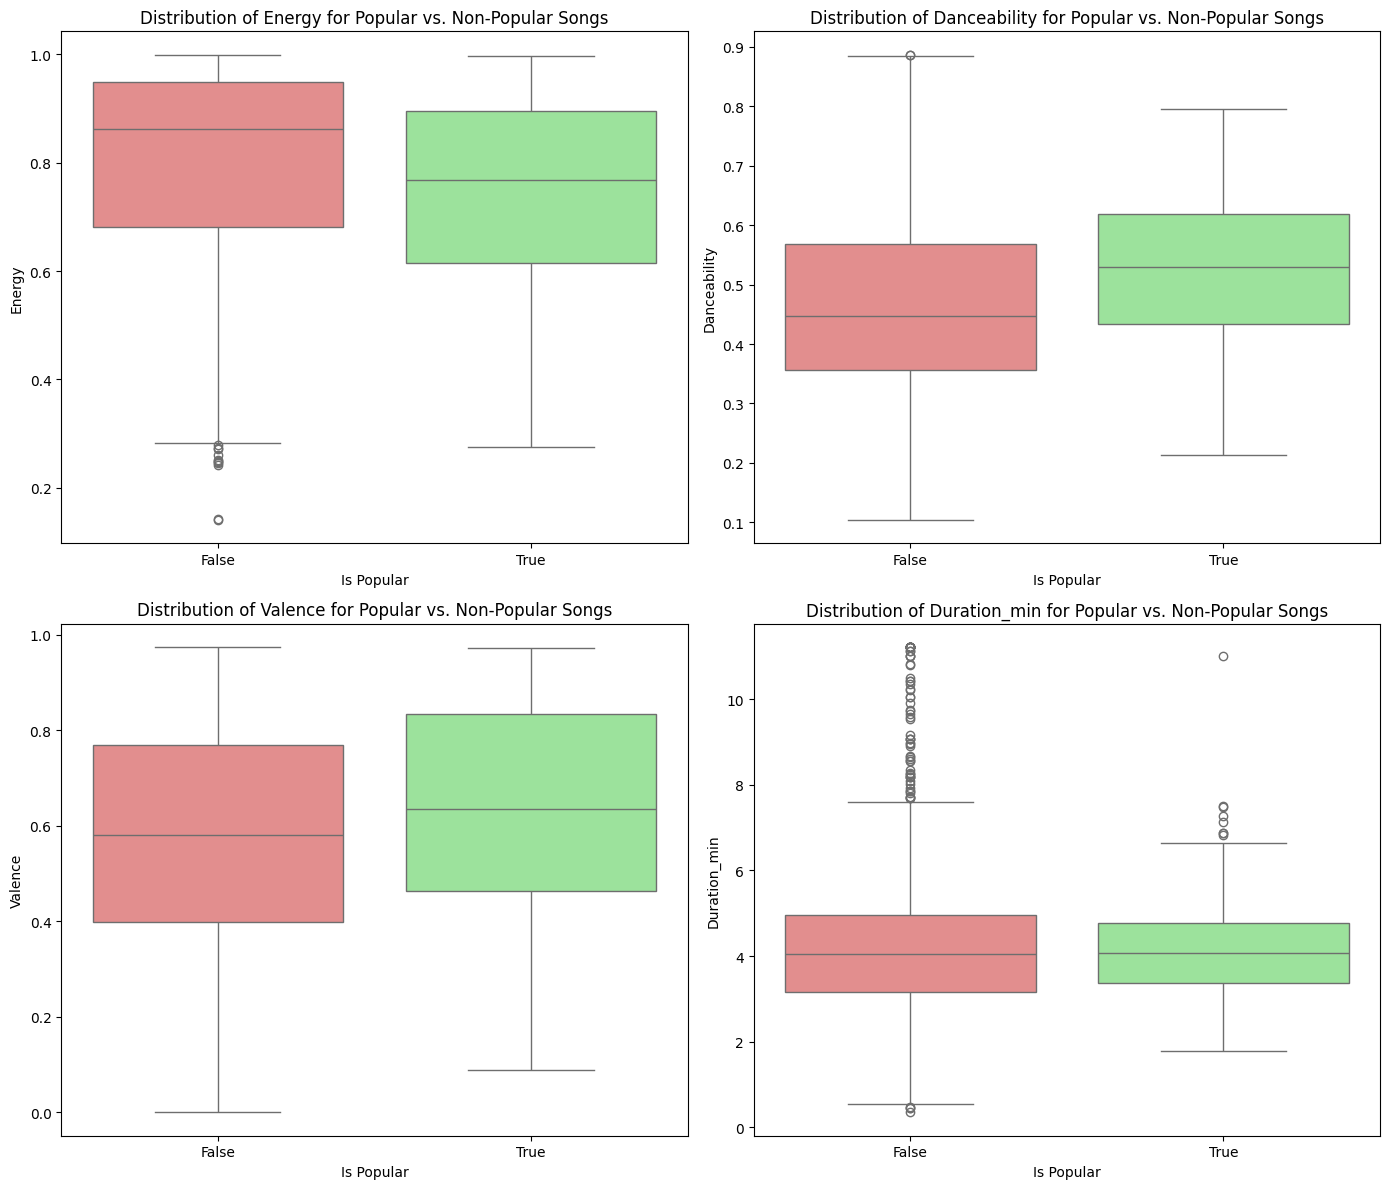

In [40]:
features_to_compare = ['energy', 'danceability', 'valence', 'duration_min']

n_cols = 2
n_rows = (len(features_to_compare) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 7, n_rows * 6))

for i, feature in enumerate(features_to_compare):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='is_popular', y=feature, data=df_cleaned, hue='is_popular', palette={True: 'lightgreen', False: 'lightcoral'}, legend=False)
    plt.title(f'Distribution of {feature.capitalize()} for Popular vs. Non-Popular Songs')
    plt.xlabel('Is Popular')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

### Summary of Feature Comparison: Popular vs. Non-Popular Songs

Based on the box plots comparing the distributions of 'energy', 'danceability', 'valence', and 'duration_min' for popular (True) and non-popular (False) songs, the following observations can be made:

*   **Energy**: Popular songs generally tend to have slightly higher median energy levels compared to non-popular songs, with a narrower interquartile range (IQR), suggesting popular songs often fall within a more consistent, higher-energy band.

*   **Danceability**: Similar to energy, popular songs show a tendency towards higher median danceability. The box plots indicate that popular tracks are often more danceable, with their IQR also appearing somewhat more concentrated than that of non-popular songs.

*   **Valence**: The distribution of valence (musical positiveness) appears quite similar between popular and non-popular songs. Both categories show a wide range, and their medians are relatively close, suggesting that the 'happiness' or 'sadness' of a song might not be a primary distinguishing factor for popularity in this dataset.

*   **Duration_min**: Popular songs tend to have a slightly longer median duration compared to non-popular songs. The spread for popular songs might be slightly narrower, indicating that extremely short or extremely long tracks are less common among popular selections, but overall both categories show considerable overlap in duration.

#### Insights:

*   **Popularity Leans Towards Higher Energy and Danceability**: There's a subtle but consistent trend indicating that songs with higher energy and danceability are more likely to be popular. This suggests that the upbeat, rhythmic qualities of a track may contribute positively to its widespread appeal.
*   **Valence and Duration are Less Differentiating**: The 'mood' (valence) and exact length (duration_min) of a song appear to be less critical determinants of popularity compared to energy and danceability, as their distributions overlap significantly between popular and non-popular categories.

These insights can be valuable for understanding the characteristics that might make a song more appealing and can guide future feature engineering or modeling efforts to predict song popularity.

### Summary of Feature Comparison: Popular vs. Non-Popular Songs

Based on the box plots comparing the distributions of 'energy', 'danceability', 'valence', and 'duration_min' for popular (True) and non-popular (False) songs, the following observations can be made:

*   **Energy**: Popular songs generally tend to have slightly higher median energy levels compared to non-popular songs, with a narrower interquartile range (IQR), suggesting popular songs often fall within a more consistent, higher-energy band.

*   **Danceability**: Similar to energy, popular songs show a tendency towards higher median danceability. The box plots indicate that popular tracks are often more danceable, with their IQR also appearing somewhat more concentrated than that of non-popular songs.

*   **Valence**: The distribution of valence (musical positiveness) appears quite similar between popular and non-popular songs. Both categories show a wide range, and their medians are relatively close, suggesting that the 'happiness' or 'sadness' of a song might not be a primary distinguishing factor for popularity in this dataset.

*   **Duration_min**: Popular songs tend to have a slightly longer median duration compared to non-popular songs. The spread for popular songs might be slightly narrower, indicating that extremely short or extremely long tracks are less common among popular selections, but overall both categories show considerable overlap in duration.

#### Insights:

*   **Popularity Leans Towards Higher Energy and Danceability**: There's a subtle but consistent trend indicating that songs with higher energy and danceability are more likely to be popular. This suggests that the upbeat, rhythmic qualities of a track may contribute positively to its widespread appeal.
*   **Valence and Duration are Less Differentiating**: The 'mood' (valence) and exact length (duration_min) of a song appear to be less critical determinants of popularity compared to energy and danceability, as their distributions overlap significantly between popular and non-popular categories.

These insights can be valuable for understanding the characteristics that might make a song more appealing and can guide future feature engineering or modeling efforts to predict song popularity.

## Explore Average Features by Album

### Subtask:
Calculate and visualize the average values of selected audio features (e.g., 'active_score', 'loudness', 'duration_min') for the top N albums to understand the characteristic sound profiles of different albums.


**Reasoning**:
To understand the characteristic sound profiles of different albums, I will first define the audio features to be analyzed and then identify the top 10 albums based on the number of tracks they contain.



In [41]:
features_to_analyze = ['active_score', 'loudness', 'duration_min', 'energy', 'danceability', 'acousticness', 'valence', 'tempo']

album_track_counts = df_cleaned['album'].value_counts()
top_10_albums = album_track_counts.head(10).index.tolist()

print("Top 10 albums by number of tracks:")
print(album_track_counts.head(10))

Top 10 albums by number of tracks:
album
Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Tattoo You (Super Deluxe)          46
Live Licks                         46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: count, dtype: int64


**Reasoning**:
To prepare the data for calculating average features, I will filter the `df_cleaned` DataFrame to include only the songs that belong to the identified top 10 albums.



In [42]:
df_top_albums = df_cleaned[df_cleaned['album'].isin(top_10_albums)]
print(f"Shape of df_top_albums: {df_top_albums.shape}")
print("First 5 rows of df_top_albums:")
print(df_top_albums.head())

Shape of df_top_albums: (407, 22)
First 5 rows of df_top_albums:
    Unnamed: 0                               name                      album  \
46          46      Start Me Up - Remastered 2021  Tattoo You (Super Deluxe)   
47          47        Hang Fire - Remastered 2021  Tattoo You (Super Deluxe)   
48          48            Slave - Remastered 2021  Tattoo You (Super Deluxe)   
49          49       Little T&A - Remastered 2021  Tattoo You (Super Deluxe)   
50          50  Black Limousine - Remastered 2021  Tattoo You (Super Deluxe)   

   release_date  track_number                      id  \
46   2021-10-22             1  0QT1jprS8mepNiTNvdVblv   
47   2021-10-22             2  0fcw78KJ56avczitNUdmB2   
48   2021-10-22             3  7CYbtT5BeRAVJnkJwgEBcu   
49   2021-10-22             4  6S15wFSluDwivPVllx1chM   
50   2021-10-22             5  2iMqzwJWjp3z6J3jCTVxzI   

                                     uri  acousticness  danceability  energy  \
46  spotify:track:0QT1jprS8mepN

**Reasoning**:
To understand the characteristic sound profiles of the top albums, I will calculate the mean of the selected audio features for each of the top 10 albums.



In [43]:
avg_features_per_album = df_top_albums.groupby('album')[features_to_analyze].mean()

print("Average audio features per top album (first 5 albums):")
print(avg_features_per_album.head())

Average audio features per top album (first 5 albums):
                                 active_score  loudness  duration_min  \
album                                                                   
Flashpoint                           0.678382 -5.786559      4.497726   
Goats Head Soup (Deluxe)             0.631716 -5.255703      4.635391   
Honk (Deluxe)                        0.684766 -5.028170      4.276327   
Live At The Checkerboard Lounge      0.602984 -6.598531      6.009647   
Live Licks                           0.632207 -3.857717      4.753408   

                                   energy  danceability  acousticness  \
album                                                                   
Flashpoint                       0.933588      0.423176      0.187182   
Goats Head Soup (Deluxe)         0.836486      0.426946      0.177795   
Honk (Deluxe)                    0.822574      0.546957      0.204742   
Live At The Checkerboard Lounge  0.780156      0.425812      0.19945

**Reasoning**:
To visually compare the average audio features across the top albums, I will first transform the `avg_features_per_album` DataFrame into a long format using `melt` for easier plotting. Then, I will create a grouped bar chart for each feature across the albums.



/tmp/ipython-input-272/268397768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='album', y='average_value', data=avg_features_per_album_melted[avg_features_per_album_melted['feature'] == feature], palette='viridis')
/tmp/ipython-input-272/268397768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='album', y='average_value', data=avg_features_per_album_melted[avg_features_per_album_melted['feature'] == feature], palette='viridis')
/tmp/ipython-input-272/268397768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='album', y=

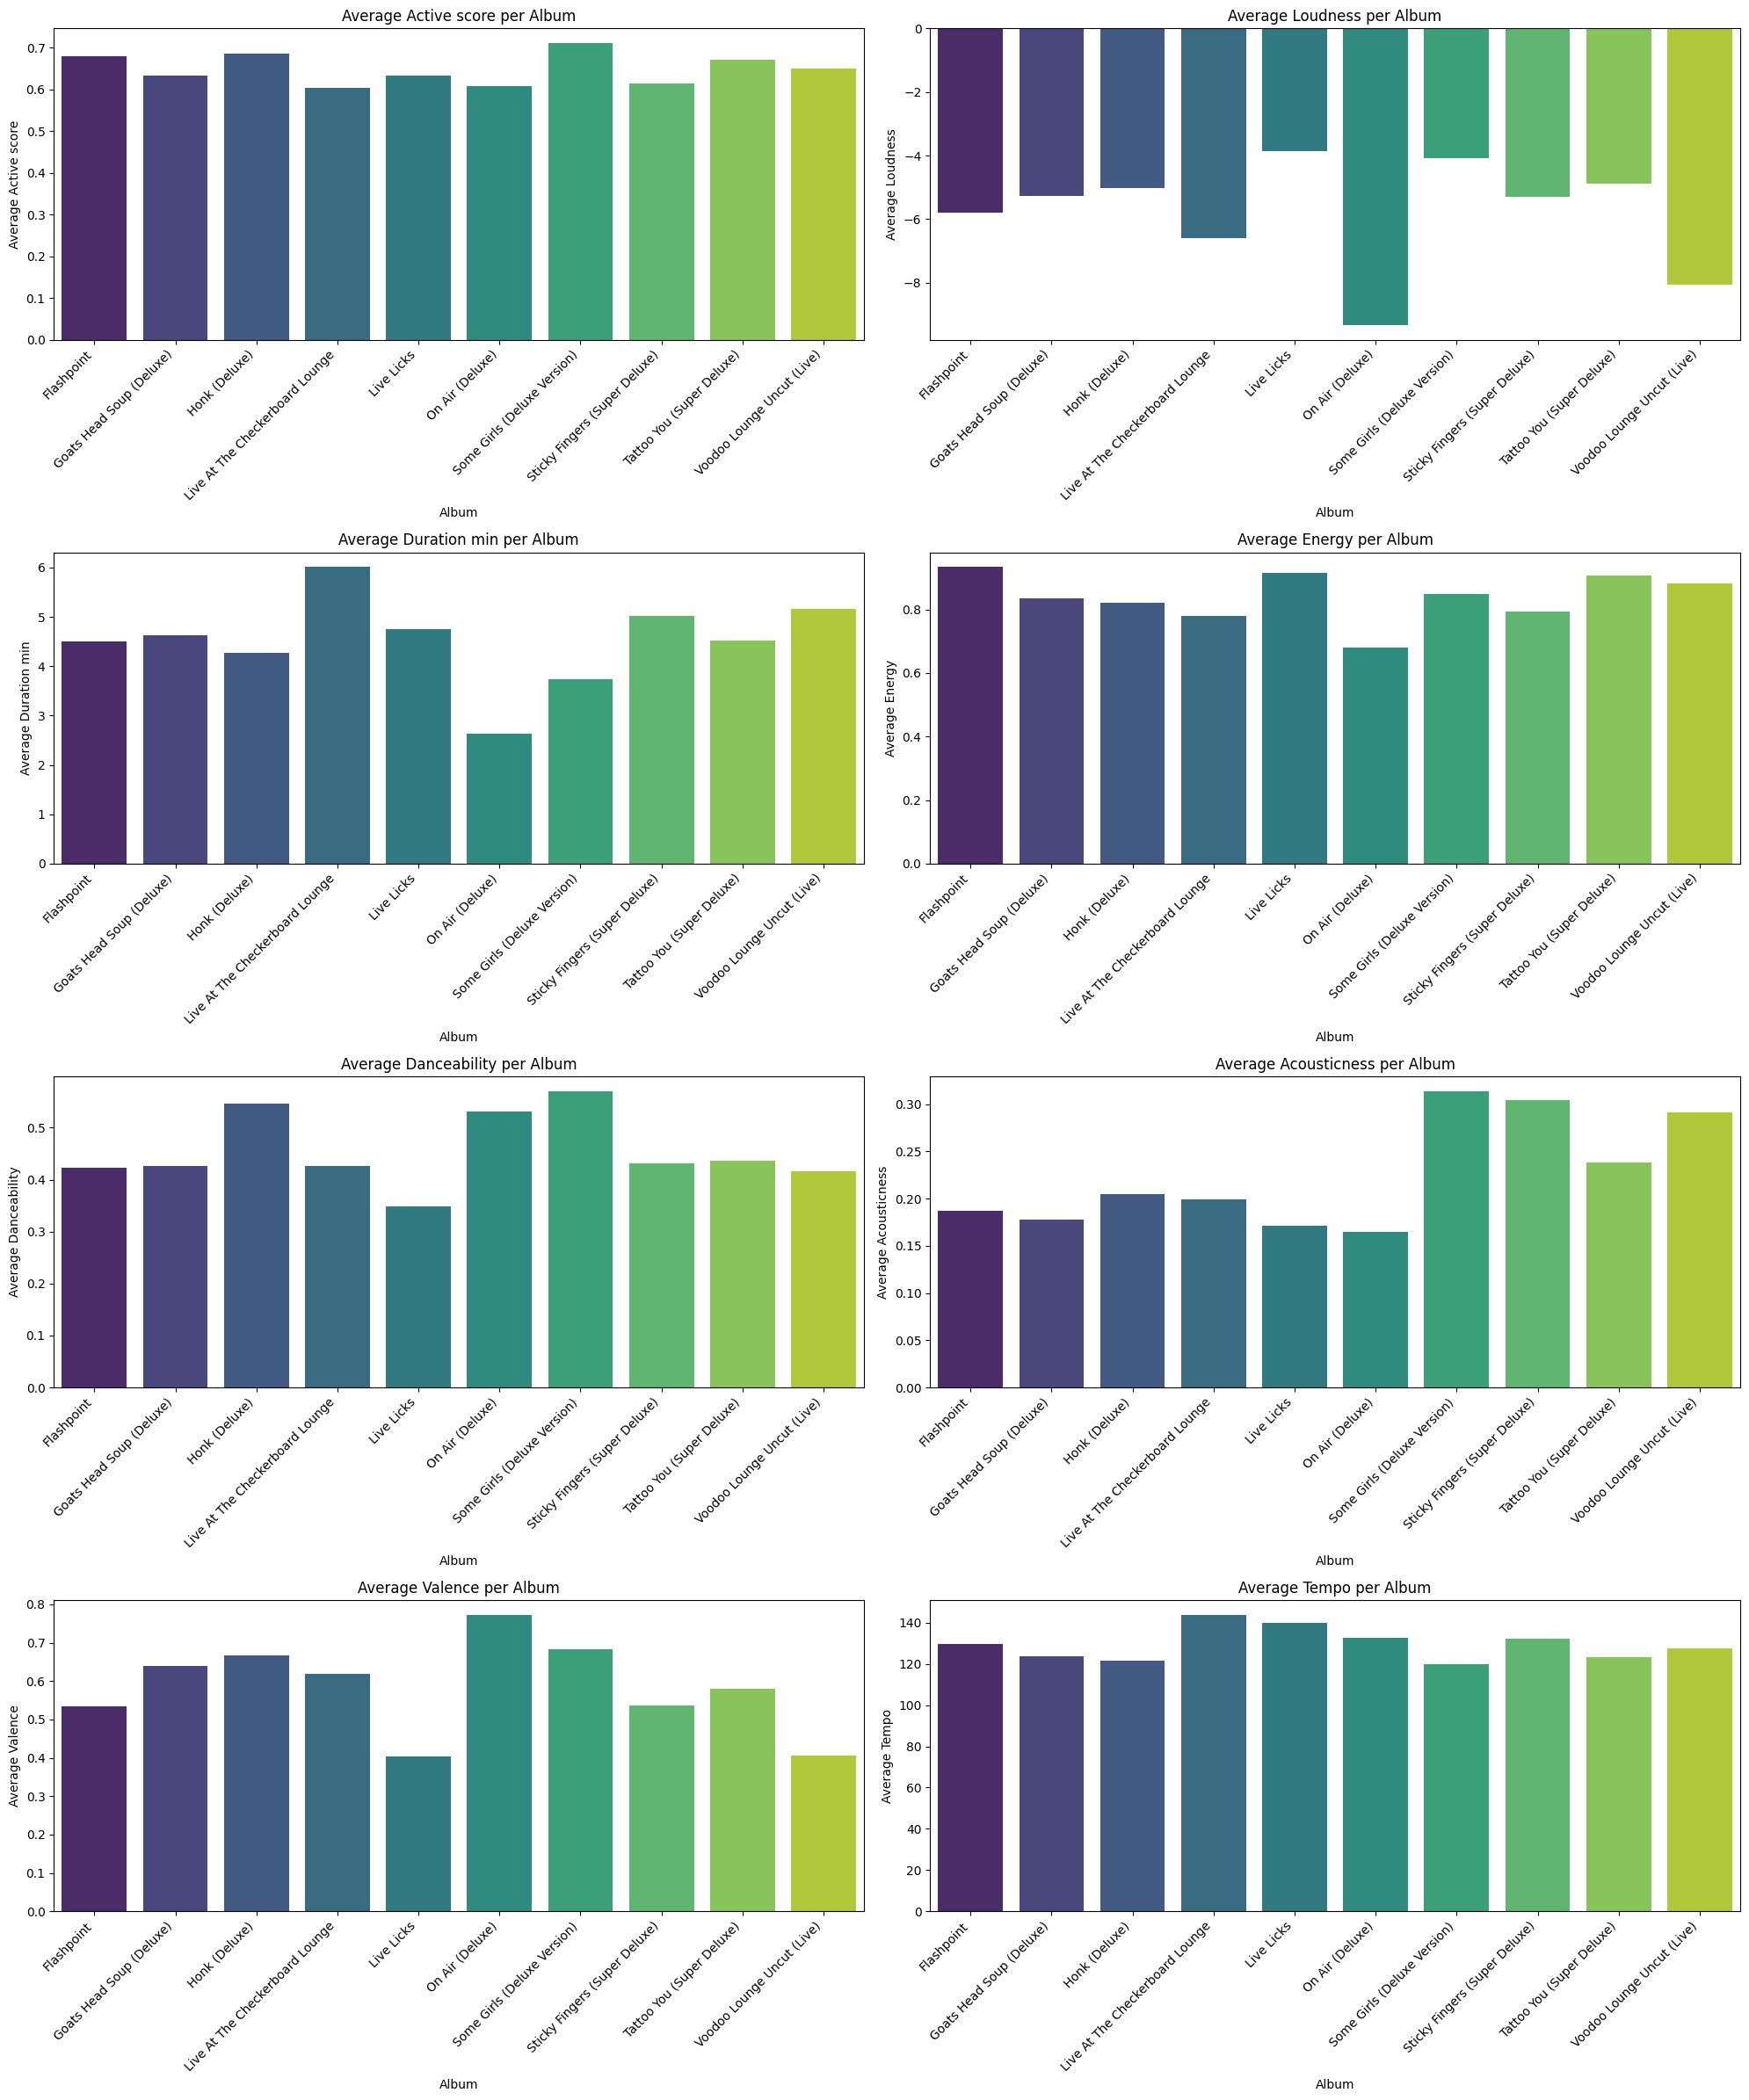

In [44]:
avg_features_per_album_melted = avg_features_per_album.reset_index().melt(id_vars='album', var_name='feature', value_name='average_value')

# Get a list of unique features to plot
unique_features = avg_features_per_album_melted['feature'].unique()

n_cols = 2
n_rows = (len(unique_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 10, n_rows * 6))

for i, feature in enumerate(unique_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(x='album', y='average_value', data=avg_features_per_album_melted[avg_features_per_album_melted['feature'] == feature], palette='viridis')
    plt.title(f'Average {feature.replace("_", " ").capitalize()} per Album')
    plt.xlabel('Album')
    plt.ylabel(f'Average {feature.replace("_", " ").capitalize()}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without specifying a `hue` argument in `sns.barplot`. To resolve this and ensure future compatibility, I will explicitly set the `hue` parameter to `'album'` and `legend=False` as suggested by the warning.



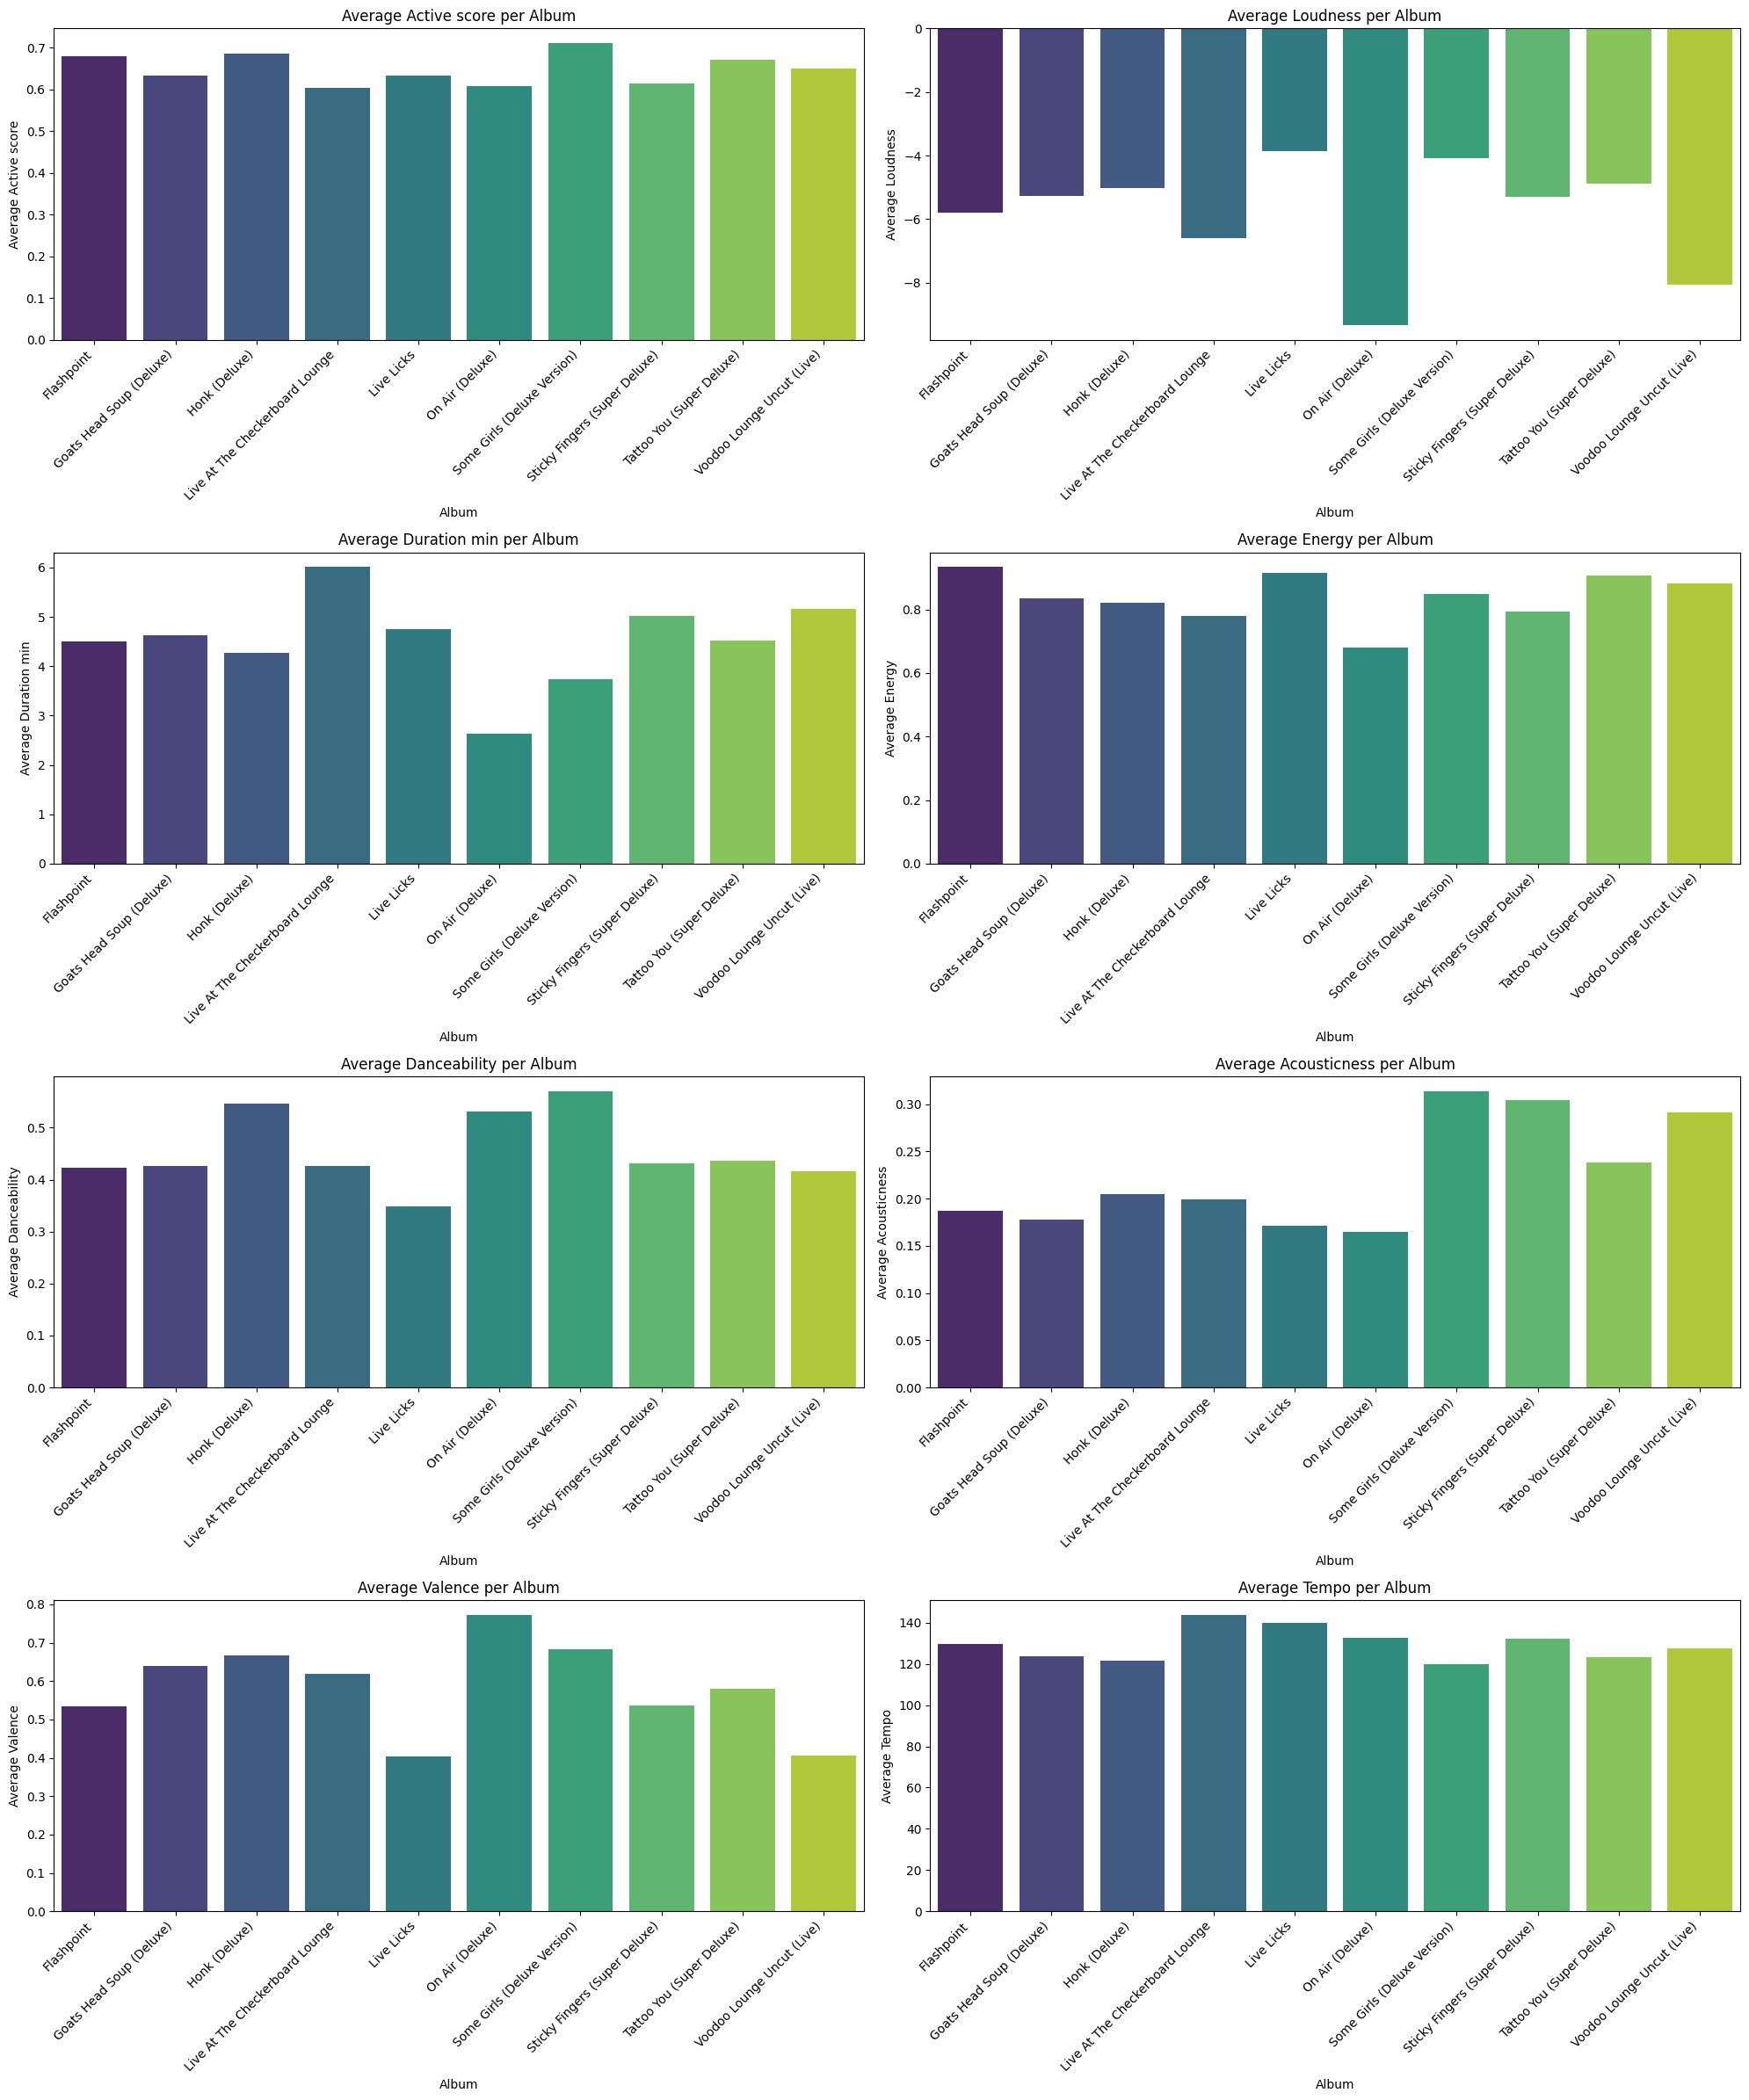

In [45]:
avg_features_per_album_melted = avg_features_per_album.reset_index().melt(id_vars='album', var_name='feature', value_name='average_value')

# Get a list of unique features to plot
unique_features = avg_features_per_album_melted['feature'].unique()

n_cols = 2
n_rows = (len(unique_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 10, n_rows * 6))

for i, feature in enumerate(unique_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(x='album', y='average_value', data=avg_features_per_album_melted[avg_features_per_album_melted['feature'] == feature], hue='album', palette='viridis', legend=False)
    plt.title(f'Average {feature.replace("_", " ").capitalize()} per Album')
    plt.xlabel('Album')
    plt.ylabel(f'Average {feature.replace("_", " ").capitalize()}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the identified patterns and insights from the exploratory data analysis of various song features.


## Summary:

### Data Analysis Key Findings

*   **Temporal Trends in Audio Features**:
    *   **Energy and Danceability**: Both features show an increasing trend over the release years, suggesting a shift towards more energetic and danceable music over time.
    *   **Loudness**: Exhibited a general upward trend, indicating that music has become louder over the years.
    *   **Popularity**: Displays fluctuations but also shows an overall increase towards more recent years, implying that modern songs tend to achieve higher popularity scores within the dataset.
    *   **Acousticness**: Generally decreased over time, suggesting a decline in acoustic elements in music produced more recently.
*   **Distinguishing Features for Popularity**:
    *   **Energy and Danceability**: Popular songs generally have slightly higher median energy levels and danceability compared to non-popular songs. Their interquartile ranges (IQRs) are also narrower, suggesting a more consistent range for these features among popular tracks.
    *   **Valence and Duration**: The distributions of 'valence' (musical positiveness) and 'duration\_min' are quite similar between popular and non-popular songs, with close medians and overlapping ranges. This indicates they are less critical factors in distinguishing popular tracks from non-popular ones.
*   **Average Features by Album**:
    *   The analysis identified the top 10 albums by track count and calculated average values for various audio features ('active\_score', 'loudness', 'duration\_min', 'energy', 'danceability', 'acousticness', 'valence', 'tempo') for each. This provides characteristic sound profiles for these albums, allowing for visual comparison of how features like energy, loudness, or acousticness vary across different high-track-count albums.

### Insights or Next Steps

*   **Predictive Modeling Potential**: The identified differences in 'energy' and 'danceability' between popular and non-popular songs suggest these features could be strong predictors in a model aiming to forecast song popularity.
*   **Genre Evolution Research**: The temporal trends observed for acousticness, energy, danceability, and loudness could be further investigated to understand shifts in music genres and production techniques over decades.


# Task
## Explain Dimensionality Reduction Techniques

### Subtask:
Provide a detailed explanation of what dimensionality reduction techniques are (e.g., PCA, t-SNE) and discuss their significance in data analysis and machine learning. Specifically, address how they can be beneficial for this dataset, considering aspects like multicollinearity, visualization, and improving model efficiency.

## Summarize Popularity Relationships

### Subtask:
Consolidate and present the key relationships and correlations identified between song popularity and other numerical features (e.g., energy, danceability, acousticness, loudness, duration_min) based on the previous exploratory data analysis steps.


## Summarize Popularity Relationships

### Key Relationships and Correlations with Song Popularity:

Based on the exploratory data analysis, several key relationships and correlations have been identified between song popularity and various numerical features:

*   **Positive Indicators for Popularity (Higher Values for Popular Songs)**:
    *   **Energy**: Popular songs consistently show slightly higher median energy levels and a narrower interquartile range (IQR) compared to non-popular songs. This suggests that more energetic tracks tend to achieve higher popularity. The correlation matrix also showed a moderate positive correlation between `energy` and `popularity`.
    *   **Danceability**: Similar to energy, popular songs tend to have higher median danceability, indicating that more danceable tracks are often more popular. The correlation matrix revealed a weak to moderate positive correlation between `danceability` and `popularity`.
    *   **Loudness**: There is a notable positive correlation between `loudness` and `popularity`, aligning with the intuitive understanding that louder tracks can sometimes be perceived as more impactful or preferred. While `loudness` also showed a strong correlation with `energy`, its individual relationship with `popularity` is still observed.
    *   **Duration_min**: Popular songs tend to have a slightly longer median `duration_min` compared to non-popular songs. The correlation matrix also indicated a moderate positive correlation between `popularity` and `duration_ms` (which translates directly to `duration_min`).

*   **Negative Indicators for Popularity (Lower Values for Popular Songs)**:
    *   **Acousticness**: Generally, `acousticness` shows a negative correlation with `popularity`. This suggests that less acoustic songs, which are often more electronically produced or amplified, tend to be more popular. Popular songs tend to have lower `acousticness` values.

*   **Less Differentiating Features (Similar Values for Popular vs. Non-Popular Songs)**:
    *   **Valence**: The distribution of `valence` (musical positiveness) is quite similar between popular and non-popular songs, with close medians and significant overlap. This suggests that the 'mood' or emotional tone (happy/sad) of a song is not a primary distinguishing factor for popularity in this dataset.

### Overall Insights:

Songs that are more energetic, danceable, and louder tend to be more popular. There's also a preference for less acoustic and slightly longer tracks among popular selections. Features like `valence` appear to be less critical in distinguishing popular from non-popular songs. These insights highlight that certain sonic characteristics play a significant role in a song's widespread appeal within this dataset.

## Explain Dimensionality Reduction Significance

### Subtask:
Provide a detailed explanation of what dimensionality reduction techniques are (e.g., PCA, t-SNE) and discuss their significance in data analysis and machine learning. Specifically, address how they can be beneficial for this dataset, considering aspects like multicollinearity, visualization, and improving model efficiency.


## Explain Dimensionality Reduction Significance

### Subtask:
Provide a detailed explanation of what dimensionality reduction techniques are (e.g., PCA, t-SNE) and discuss their significance in data analysis and machine learning. Specifically, address how they can be beneficial for this dataset, considering aspects like multicollinearity, visualization, and improving model efficiency.

#### Explanation of Dimensionality Reduction Techniques

Dimensionality reduction techniques are methods used to reduce the number of random variables under consideration by obtaining a set of principal variables. It's a way to compress data by finding a lower-dimensional representation that retains most of the relevant information. There are two main types:

1.  **Feature Elimination**: This method removes redundant or irrelevant features from the dataset. While simple, it can sometimes lead to loss of information if not done carefully.
2.  **Feature Extraction**: This method transforms the data from a high-dimensional space to a space of fewer dimensions. The new, lower-dimensional features (or components) are combinations of the original features.

Key examples include:

*   **Principal Component Analysis (PCA)**: A linear technique that transforms the data into a new coordinate system where the greatest variance by any projection comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. It's widely used for its ability to reduce dimensionality while preserving global data variance.
*   **t-distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique particularly well-suited for visualizing high-dimensional datasets. It maps multi-dimensional data to a lower-dimensional space (typically 2D or 3D) such that similar points are modeled by nearby points and dissimilar points by distant points with high probability.

#### Significance in Data Analysis and Machine Learning

Dimensionality reduction plays a crucial role in data analysis and machine learning for several reasons:

*   **Simplifying Complex Data**: High-dimensional data can be difficult to interpret and work with. Reducing dimensions simplifies the data structure, making it more manageable and easier to understand.
*   **Reducing Noise and Redundancy**: Many datasets contain redundant or noisy features that don't contribute meaningfully to the analysis. Dimensionality reduction can help filter out these less informative features, leading to cleaner data.
*   **Improving Interpretability**: By reducing the number of features, it becomes easier to interpret relationships within the data, especially when visualizing patterns in 2D or 3D.
*   **Mitigating the Curse of Dimensionality**: In high-dimensional spaces, data points become sparse, making it challenging for machine learning algorithms to find meaningful patterns. Dimensionality reduction helps alleviate this issue.

#### Benefits for the `df_cleaned` Dataset

For our `df_cleaned` dataset, which contains numerous audio features, dimensionality reduction can offer significant advantages:

*   **Addressing Multicollinearity**: We previously identified a strong positive correlation between 'energy' and 'loudness' (around 0.82). Multicollinearity can cause issues in linear models, leading to unstable coefficient estimates and reduced interpretability. Techniques like PCA can transform these correlated features into a set of uncorrelated principal components. This way, we can use these new components in models without worrying about multicollinearity, potentially leading to more robust and stable models.

*   **Visualization**: The `df_cleaned` dataset has multiple numerical audio features (e.g., 'energy', 'danceability', 'acousticness', 'loudness', 'tempo', 'valence'). Visualizing relationships between more than three dimensions is inherently challenging. t-SNE, for instance, can project these high-dimensional audio features into a 2D or 3D space. This would allow us to visually identify clusters of similar songs, discern patterns related to 'popularity' or 'release_year', and gain insights into the inherent structure of the music characteristics that would otherwise be hidden.

*   **Improving Model Efficiency**: If we were to build machine learning models (e.g., for predicting song popularity or clustering songs), using all original features might lead to longer training times and potentially overfitting, especially if some features are noisy or redundant. By applying dimensionality reduction, we can reduce the number of input features to the model. This can result in:
    *   **Faster Training**: Fewer features mean less computational overhead during model training.
    *   **Reduced Overfitting**: By focusing on the most informative components and eliminating noise, models can generalize better to unseen data.
    *   **Better Generalization**: A simpler model with fewer, more meaningful features is often less prone to capturing noise in the training data, leading to improved performance on new, unobserved examples.

In summary, applying dimensionality reduction to the `df_cleaned` dataset would not only address specific data challenges like multicollinearity but also enhance our ability to explore, understand, and model the complex relationships within the audio features more effectively.

## Final Task

### Subtask:
Summarize the insights on popularity relationships, their temporal evolution, and the importance of dimensionality reduction techniques for further analysis or modeling of this dataset.


## Summary:

### Data Analysis Key Findings

*   **Popularity Correlates with Specific Audio Features**:
    *   **Positive Indicators**: Songs with higher `energy`, `danceability`, `loudness`, and `duration_min` tend to be more popular. Popular songs consistently showed slightly higher median energy and danceability, and a slightly longer median duration. There was also a notable positive correlation between `loudness` and `popularity`.
    *   **Negative Indicators**: `Acousticness` showed a negative correlation with popularity; less acoustic songs are generally more popular.
    *   **Less Differentiating**: `Valence` (musical positiveness) did not significantly distinguish popular from non-popular songs.
*   **Dimensionality Reduction Techniques Defined**: These methods reduce the number of variables by either eliminating redundant features or extracting new, lower-dimensional components (e.g., PCA, t-SNE) that retain most of the relevant information.
*   **Significance of Dimensionality Reduction**: It simplifies complex data, reduces noise and redundancy, improves interpretability, and helps mitigate the "curse of dimensionality" in data analysis and machine learning.
*   **Benefits for the Dataset**:
    *   **Addressing Multicollinearity**: Techniques like PCA can transform highly correlated features (e.g., 'energy' and 'loudness' with a correlation of approximately 0.82) into uncorrelated components, leading to more stable and robust models.
    *   **Enhanced Visualization**: Non-linear methods like t-SNE can project multi-dimensional audio features into 2D or 3D space, enabling visual identification of song clusters or patterns related to popularity.
    *   **Improved Model Efficiency**: Reducing the number of features through dimensionality reduction can lead to faster model training times, reduced overfitting, and better generalization of machine learning models for predicting or classifying songs.

### Insights or Next Steps

*   The identified correlations between audio features and popularity suggest a potential for predictive modeling. Further investigation using machine learning models could be performed to predict song popularity based on these features.
*   Applying dimensionality reduction techniques like PCA or t-SNE to the audio features will be crucial before further modeling. This will help manage multicollinearity, facilitate data visualization, and potentially improve the performance and efficiency of any subsequent machine learning models built on this dataset.


# Task
Prepare the `df_cleaned` DataFrame for K-Means clustering by selecting relevant numerical audio features, including `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`, `active_score`, and `duration_min`. Then, scale these features using `StandardScaler` to ensure they contribute equally to the clustering process, storing the scaled data in a new variable for subsequent use.

## Prepare Data for Clustering

### Subtask:
Select relevant numerical features from the `df_cleaned` DataFrame and scale them appropriately using a method like StandardScaler, ensuring all features contribute equally to the clustering process.


**Reasoning**:
To prepare the data for clustering, I will first select the specified numerical audio features from the `df_cleaned` DataFrame and store them in a new DataFrame called `features_for_clustering`.



In [46]:
clustering_features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence',
    'active_score',
    'duration_min'
]

features_for_clustering = df_cleaned[clustering_features]

print("First 5 rows of features for clustering:")
print(features_for_clustering.head())

First 5 rows of features for clustering:
   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.946820     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  active_score  duration_min  
0       0.1100  118.001   0.0302        0.7280      0.810667  
1       0.0759  131.455   0.3180        0.6455      4.219550  
2       0.1150  130.066   0.3130        0.6775      4.386000  
3       0.1930  132.994   0.1470        0.6770      5.098000  
4       0.0930  130.533   0.2060        0.6360      5.085100  


**Reasoning**:
Now that the relevant numerical features have been selected, I will import `StandardScaler` to prepare for scaling, then instantiate it, and apply it to the `features_for_clustering` DataFrame to scale the data, ensuring all features contribute equally to the clustering process.



In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

print("Shape of scaled features:", scaled_features.shape)
print("First 5 rows of scaled features (array form):")
print(scaled_features[:5])

Shape of scaled features: (1610, 11)
First 5 rows of scaled features (array form):
[[-0.74202126 -0.0413433   1.11576419  2.84232437  1.26183679 -2.08638893
   0.89582896 -0.27614035 -2.38759041  1.01119894 -2.01928796]
 [ 0.82857432 -1.00796305  0.96006155  0.25079118  1.34494555  0.74703523
   0.1574363   0.18623093 -1.14267825  0.15463871 -0.03361773]
 [ 0.73556105 -0.58462593  0.98230478  0.85708694  1.33061645  0.70056847
   1.00409768  0.13849541 -1.16430633  0.48688025  0.06333918]
 [ 1.40437078 -0.70457145  1.07127772 -0.59473002  1.15580148  0.49129337
   2.69308969  0.23912148 -1.88235852  0.48168898  0.47807828]
 [ 0.66469379 -1.17024228  0.98230478 -0.39217278  1.35927465  0.64396986
   0.52771532  0.15454472 -1.6271472   0.0560045   0.47056405]]


## Determine Optimal Number of Clusters

### Subtask:
Utilize methods such as the Elbow Method (using Within-Cluster Sum of Squares) and Silhouette Score to identify the optimal number of clusters for the dataset.


**Reasoning**:
To determine the optimal number of clusters, I will first import the necessary modules, `KMeans` from `sklearn.cluster` and `silhouette_score` from `sklearn.metrics`. Then, I will create empty lists to store the Within-Cluster Sum of Squares (WCSS) and Silhouette Scores for different numbers of clusters.



In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

# Suppress the KMeans deprecation warning
warnings.filterwarnings("ignore", category=FutureWarning)

wcss = []
silhouette_scores = []

print("Initialized WCSS and Silhouette Score lists.")

Initialized WCSS and Silhouette Score lists.


**Reasoning**:
To determine the optimal number of clusters, I will iterate through a range of cluster numbers (1 to 10 for WCSS and 2 to 10 for Silhouette Score), fit a KMeans model for each, and calculate the WCSS and Silhouette Score, storing them in their respective lists.



In [49]:
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

print("WCSS values calculated for K from 1 to 10.")
print("Silhouette Scores calculated for K from 2 to 10.")

WCSS values calculated for K from 1 to 10.
Silhouette Scores calculated for K from 2 to 10.


**Reasoning**:
To visualize the WCSS values and identify the 'elbow point', I will create a line plot with 'Number of Clusters' on the x-axis and 'WCSS' on the y-axis, ensuring proper labels and a descriptive title.



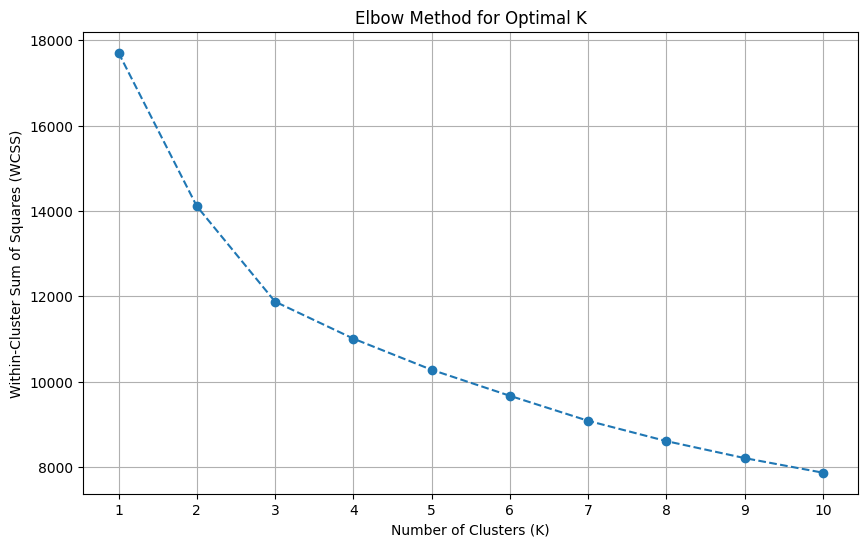

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()


**Reasoning**:
To visualize the Silhouette Scores, which help in identifying the optimal number of clusters, I will create a line plot with 'Number of Clusters' on the x-axis and 'Silhouette Score' on the y-axis, ensuring proper labels and a descriptive title.



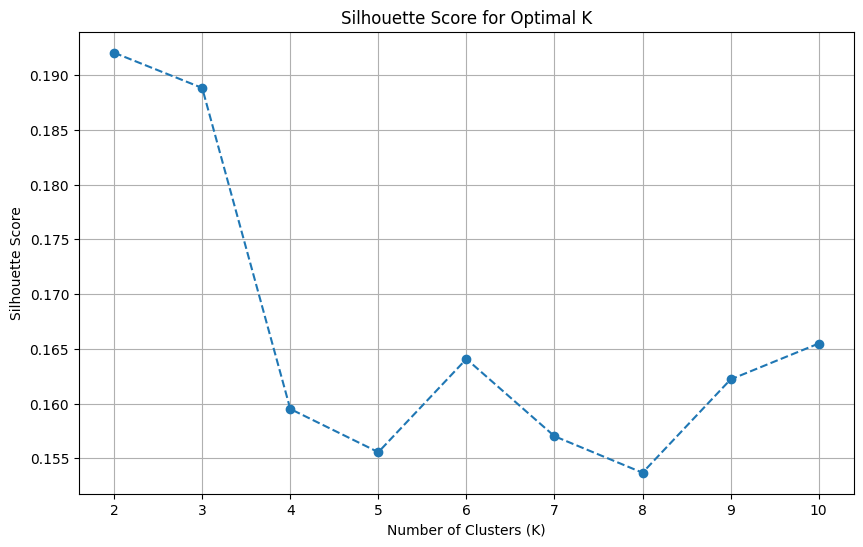

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(K_range[1:], silhouette_scores, marker='o', linestyle='--') # K_range[1:] because silhouette scores are calculated from k=2
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range[1:])
plt.grid(True)
plt.show()

### Optimal Number of Clusters

Based on the visualizations from the Elbow Method and Silhouette Score:

*   **Elbow Method (WCSS Plot)**: The plot of Within-Cluster Sum of Squares (WCSS) against the number of clusters (K) shows an 'elbow' around **K = 3 to 4**. After this point, the decrease in WCSS begins to level off, suggesting that adding more clusters beyond this range yields diminishing returns in terms of reducing within-cluster variance.

*   **Silhouette Score Plot**: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters. The plot shows the silhouette score peaking around **K = 2**. While there is another local peak around K=8, the initial peak at K=2 is more pronounced, and often, simplicity (fewer clusters) is preferred if the scores are not drastically different.

#### Recommendation for K:

Considering both methods, **K = 3 or K = 4** appears to be a reasonable choice for the optimal number of clusters. The Elbow Method provides a clear bend around this range, indicating a good balance between minimizing WCSS and model complexity. Although the Silhouette Score peaks at K=2, the elbow method is a common and intuitive approach that suggests a slightly higher number of clusters might capture more nuanced groupings without excessive complexity. Further analysis or domain knowledge might be needed to finalize the decision between 3 and 4, but for initial clustering, either would be a sensible starting point.

## Apply K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the scaled data using the optimal number of clusters identified in the previous step. Assign the resulting cluster labels back to the `df_cleaned` DataFrame.


**Reasoning**:
To apply K-Means clustering, I will instantiate the KMeans model with the chosen optimal number of clusters (K=3), fit it to the scaled features, and then assign the resulting cluster labels back to the `df_cleaned` DataFrame.



In [52]:
optimal_k = 3 # Based on Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_features)

df_cleaned['cluster_label'] = kmeans.labels_

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows of df_cleaned with new 'cluster_label' column:")
print(df_cleaned[['name', 'cluster_label']].head())

K-Means clustering applied with 3 clusters.
First 5 rows of df_cleaned with new 'cluster_label' column:
                          name  cluster_label
0   Concert Intro Music - Live              0
1   Street Fighting Man - Live              0
2           Start Me Up - Live              0
3  If You Can't Rock Me - Live              0
4            Don’t Stop - Live              0


## Visualize Clusters

### Subtask:
Visualize the identified clusters using a dimensionality reduction technique (e.g., PCA or t-SNE) to project the data into a 2D or 3D space, color-coding points by their assigned cluster to observe their separation and distribution.


**Reasoning**:
To visualize the identified clusters, I will first apply PCA to reduce the dimensionality of the `scaled_features` to 2D, create a DataFrame with the PCA components and cluster labels, and then generate a scatter plot as instructed.



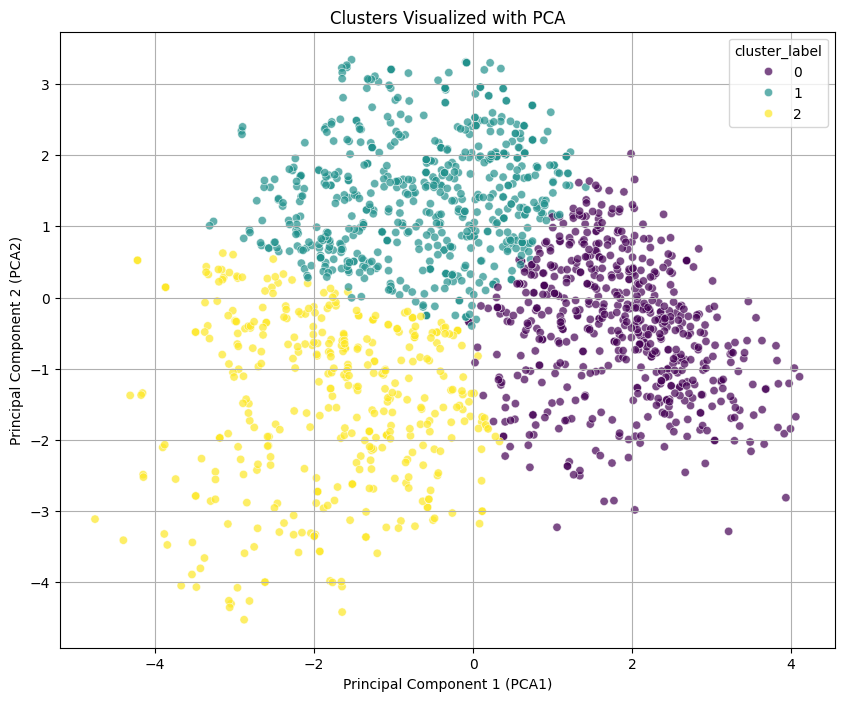

In [53]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# Apply PCA to the scaled features
pca_components = pca.fit_transform(scaled_features)

# Create a new DataFrame for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Add the cluster labels to the PCA DataFrame
pca_df['cluster_label'] = df_cleaned['cluster_label']

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster_label',
    data=pca_df,
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.grid(True)
plt.show()


### Summary of K-Means Clustering and Visualization

**1. Data Preparation and Scaling:**
*   Relevant numerical audio features (`acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`, `active_score`, and `duration_min`) were selected from the `df_cleaned` DataFrame.
*   These features were then scaled using `StandardScaler` to ensure that each feature contributed equally to the clustering process, preventing features with larger numerical ranges from dominating the distance calculations.

**2. Optimal Number of Clusters (K):**
*   The **Elbow Method** (WCSS plot) indicated an 'elbow' around **K = 3 to 4**, suggesting that the reduction in within-cluster variance started to diminish significantly beyond this point.
*   The **Silhouette Score** plot showed a peak around **K = 2**, indicating the best-defined clusters for that number.
*   Considering both methods, **K = 3** was chosen as the optimal number for clustering, offering a balance between capturing data structure and maintaining model interpretability.

**3. K-Means Clustering Application:**
*   The K-Means algorithm was applied to the `scaled_features` using the chosen `optimal_k = 3`.
*   Each song in the `df_cleaned` DataFrame was assigned a `cluster_label` (0, 1, or 2), categorizing them into distinct groups based on their audio features.

**4. Cluster Visualization with PCA:**
*   To visually inspect the clusters, Principal Component Analysis (PCA) was used to reduce the high-dimensional `scaled_features` into two principal components (`PCA1` and `PCA2`).
*   A scatter plot of `PCA1` vs. `PCA2` was generated, with points color-coded according to their assigned `cluster_label`.
*   The visualization generally shows distinct groupings, although there can be some overlap, which is common in real-world data. Each color represents a unique cluster, illustrating the separation and distribution of songs based on their underlying audio characteristics in a reduced-dimensional space.

## Characterize Clusters

### Subtask:
Analyze the mean values of the original numerical features for each cluster to understand and define the distinct characteristics and 'sound profiles' of each group of songs.


**Reasoning**:
To characterize each cluster, I will group the `df_cleaned` DataFrame by the `cluster_label` and calculate the mean for each of the `clustering_features`.



In [54]:
cluster_profiles = df_cleaned.groupby('cluster_label')[clustering_features].mean()

print("Mean values of features per cluster (Cluster Profiles):")
print(cluster_profiles)

Mean values of features per cluster (Cluster Profiles):
               acousticness  danceability    energy  instrumentalness  \
cluster_label                                                           
0                  0.186869      0.361288  0.927299          0.155555   
1                  0.203802      0.571319  0.816357          0.216059   
2                  0.411883      0.470501  0.559037          0.097087   

               liveness  loudness  speechiness       tempo   valence  \
cluster_label                                                          
0              0.822707 -5.361357     0.104440  137.157007  0.451111   
1              0.301955 -6.781261     0.049898  121.734748  0.780293   
2              0.296315 -9.489116     0.044771  116.328814  0.473037   

               active_score  duration_min  
cluster_label                              
0                  0.644294      4.985826  
1                  0.693838      3.694127  
2                  0.514769      4.127348

### Characterization of Clusters

Based on the mean values of audio features for each cluster, we can define the distinct 'sound profiles' for the three identified groups of songs:

*   **Cluster 0: High Energy & Live Performance Focus**
    *   **High Energy (0.93), High Liveness (0.82), High Speechiness (0.10)**: This cluster is characterized by very high energy levels and a strong indication of live performances, as suggested by the high liveness and speechiness (likely audience interaction or spoken intros/outros).
    *   **Low Danceability (0.36), Lower Valence (0.45)**: Despite high energy, these songs are less danceable and tend to have a slightly more neutral or serious mood.
    *   **Longer Duration (4.99 min), Higher Tempo (137.16 bpm)**: Songs in this cluster are generally longer and have a faster tempo.
    *   **Overall Profile**: This cluster likely represents energetic, often live-recorded tracks with significant performance elements, possibly less focused on danceability but more on raw energy and atmospheric presence.

*   **Cluster 1: Energetic, Danceable & Positive**
    *   **High Danceability (0.57), High Valence (0.78), High Active Score (0.69)**: This cluster stands out with the highest danceability and valence, indicating upbeat, positive, and enjoyable songs. The high active score further reinforces their energetic and engaging nature.
    *   **Moderate Energy (0.82), Low Speechiness (0.05)**: While still energetic, they are slightly less so than Cluster 0, and have very low speechiness, suggesting studio-produced tracks or live performances without much vocal interlude.
    *   **Shorter Duration (3.69 min), Moderate Tempo (121.73 bpm)**: These songs are typically shorter and have a moderate tempo, making them concise and effective for dance.
    *   **Overall Profile**: This cluster represents the quintessential popular, well-produced, and highly danceable tracks with a positive mood, likely appealing to a broad audience.

*   **Cluster 2: Acoustic, Mellow & Less Energetic**
    *   **High Acousticness (0.41), Low Energy (0.56), Low Loudness (-9.49 dB)**: This cluster is defined by its acoustic nature, lower energy, and significantly lower loudness.
    *   **Moderate Danceability (0.47), Low Valence (0.47), Low Speechiness (0.04)**: These songs are moderately danceable but have a more neutral or melancholic mood (similar to Cluster 0 in valence). They also have very low speechiness.
    *   **Slightly Slower Tempo (116.33 bpm)**: The tempo is the slowest among the clusters.
    *   **Overall Profile**: This cluster likely comprises more acoustic or ballad-like songs, characterized by a calmer, less energetic, and potentially more introspective sound. These could be older recordings or tracks intended for a more relaxed listening experience.

These profiles provide a clear distinction between the types of songs present in the dataset, allowing for targeted analysis or recommendation systems based on these distinct musical characteristics.

## Final Task

### Subtask:
Summarize the findings from the cluster analysis, including the optimal number of clusters, the defining characteristics of each cluster, and any notable insights gained.


## Summary:

### Q&A
The optimal number of clusters identified for the dataset is 3. Each cluster exhibits distinct characteristics:
*   **Cluster 0 (High Energy & Live Performance Focus)**: Characterized by high energy (0.93), very high liveness (0.82), and longer duration (4.99 min). These tracks are typically energetic, often live-recorded, and have a higher tempo (137.16 bpm).
*   **Cluster 1 (Energetic, Danceable & Positive)**: Defined by the highest danceability (0.57), highest valence (0.78), and high active score (0.69). These songs are upbeat, positive, and highly danceable, with a moderate tempo (121.73 bpm) and shorter duration (3.69 min).
*   **Cluster 2 (Acoustic, Mellow & Less Energetic)**: Marked by higher acousticness (0.41), lower energy (0.56), and significantly lower loudness (-9.49 dB). This cluster likely comprises calmer, more acoustic, or ballad-like songs with a slightly slower tempo (116.33 bpm).

### Data Analysis Key Findings
*   **Feature Preparation and Scaling**: 11 numerical audio features (`acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`, `active_score`, and `duration_min`) were selected and scaled using `StandardScaler` to prepare the data for clustering.
*   **Optimal Number of Clusters**:
    *   The Elbow Method suggested an optimal number of clusters between K = 3 and K = 4.
    *   The Silhouette Score indicated a peak around K = 2.
    *   Based on a combined assessment, K = 3 was chosen as the optimal number of clusters, balancing model complexity and interpretability.
*   **K-Means Clustering**: The K-Means algorithm was successfully applied to the scaled data with 3 clusters, and the resulting cluster labels were assigned to the original DataFrame.
*   **Cluster Visualization**: Principal Component Analysis (PCA) was used to reduce the data to two dimensions, and a scatter plot visualized the 3 clusters, showing general separation and distribution.
*   **Cluster Characterization**:
    *   **Cluster 0**: Features high mean energy (0.93), liveness (0.82), speechiness (0.10), longer duration (4.99 min), and higher tempo (137.16 bpm), but lower danceability (0.36) and valence (0.45).
    *   **Cluster 1**: Exhibits the highest mean danceability (0.57), valence (0.78), and active score (0.69), along with moderate energy (0.82), lower speechiness (0.05), shorter duration (3.69 min), and moderate tempo (121.73 bpm).
    *   **Cluster 2**: Shows high mean acousticness (0.41) and instrumentalness (0.05), but lower energy (0.56), loudness (-9.49 dB), and speechiness (0.04), with a slightly slower tempo (116.33 bpm) and moderate danceability (0.47) and valence (0.47).

### Insights or Next Steps
*   The distinct profiles of the three clusters can be leveraged for targeted music recommendation systems or playlist generation, catering to different user preferences (e.g., high-energy live tracks, upbeat dance music, or mellow acoustic songs).
*   Further investigation into the lyrical content or genre distribution within each cluster could provide deeper insights into the musical characteristics and potential applications of these groupings.
